In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Reading the file from previous notebook

In [2]:
df = pd.read_csv("/Users/shrestaveeramaneni/Desktop/Work/Dec2_df.csv")

In [3]:
df.head()

,Unnamed: 0,primaryid,init_fda_dt,fda_dt,rept_cod,mfr_sndr,age,sex,e_sub,rept_dt,reporter_country,occr_country,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dechal,pt,outc_cod,dose_freq,dose_amt
0,0,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Respiratory acidosis,HO|OT,BID,500.0
1,1,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Cardiac failure congestive,HO|OT,BID,500.0
2,2,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Torsade de pointes,HO|OT,BID,500.0
3,3,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Electrocardiogram QT prolonged,HO|OT,BID,500.0
4,4,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Agitation,HO|OT,BID,500.0


In [4]:
df.drop(['Unnamed: 0','init_fda_dt','fda_dt','val_vbm','drugname', 'drug_seq'],inplace = True,axis = 1)

In [5]:
df.head()

,primaryid,rept_cod,mfr_sndr,age,sex,e_sub,rept_dt,reporter_country,occr_country,role_cod,prod_ai,route,dechal,pt,outc_cod,dose_freq,dose_amt
0,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,Oral,D,Respiratory acidosis,HO|OT,BID,500.0
1,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,Oral,D,Cardiac failure congestive,HO|OT,BID,500.0
2,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,Oral,D,Torsade de pointes,HO|OT,BID,500.0
3,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,Oral,D,Electrocardiogram QT prolonged,HO|OT,BID,500.0
4,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,Oral,D,Agitation,HO|OT,BID,500.0


In [6]:
df['rept_cod'].value_counts()

EXP      146693
PER        5853
DIR        1290
30DAY       187
5DAY          4
Name: rept_cod, dtype: int64

In [7]:
# Converting the rept_dt to day and month
df['rept_dt'] = pd.to_datetime(df['rept_dt'])
df['day'] = df['rept_dt'].dt.day
df['month'] = df['rept_dt'].dt.month

In [8]:
df.drop(['rept_dt'],inplace = True,axis = 1)

In [9]:
# Comapring reporter_country, occr_country to check whether they have similar values. They repeat 99.45% of the time
similar_rows = df['reporter_country'] == df['occr_country']
count_similar = similar_rows.sum()
print(f"Number of rows where the columns are similar: {count_similar}")

Number of rows where the columns are similar: 152499


In [10]:
# Dictionary mapping country codes to full country names
country_map = {
    "US": "United States",
    "CA": "Canada",
    "CO": "Colombia",
    "FR": "France",
    "JP": "Japan",
    "CN": "China",
    "GB": "United Kingdom",
    "DE": "Germany",
    "IN": "India",
    "IT": "Italy",
    "PA": "Panama",
    "MX": "Mexico",
    "ES": "Spain",
    "AU": "Australia",
    "CL": "Chile",
    "IE": "Ireland",
    "BR": "Brazil",
    "AR": "Argentina",
    "BE": "Belgium",
    "PL": "Poland",
    "KR": "South Korea",
    "ZA": "South Africa",
    "PT": "Portugal",
    "EG": "Egypt",
    "CR": "Costa Rica",
    "GR": "Greece",
    "RU": "Russia",
    "PE": "Peru",
    "AT": "Austria",
    "CZ": "Czech Republic",
    "IL": "Israel",
    "DK": "Denmark",
    "SE": "Sweden",
    "NL": "Netherlands",
    "TH": "Thailand",
    "HR": "Croatia",
    "CH": "Switzerland",
    "FI": "Finland",
    "RO": "Romania",
    "LT": "Lithuania",
    "BG": "Bulgaria",
    "GT": "Guatemala",
    "NZ": "New Zealand",
    "SI": "Slovenia",
    "HU": "Hungary",
    "TR": "Turkey",
    "NO": "Norway",
    "TW": "Taiwan",
    "SK": "Slovakia",
    "HK": "Hong Kong",
    "IQ": "Iraq",
    "UA": "Ukraine",
    "IR": "Iran",
    "AE": "United Arab Emirates",
    "NI": "Nicaragua",
    "MY": "Malaysia",
    "DZ": "Algeria",
    "DO": "Dominican Republic",
    "KW": "Kuwait",
    "MT": "Malta",
    "SG": "Singapore",
    "PH": "Philippines",
    "LU": "Luxembourg",
    "PR": "Puerto Rico",
    "RS": "Serbia",
    "VN": "Vietnam",
    "SD": "Sudan",
    "ID": "Indonesia",
    "SA": "Saudi Arabia",
    "BY": "Belarus",
    "CY": "Cyprus",
    "EE": "Estonia",
    "IS": "Iceland",
    "PK": "Pakistan",
    "BD": "Bangladesh",
    "TN": "Tunisia",
    "LB": "Lebanon",
    "BH": "Bahrain",
    "KE": "Kenya",
    "CI": "Côte d'Ivoire",
    "HN": "Honduras",
    "NG": "Nigeria",
    "SY": "Syria"
}


df['reporter_country'] = df['reporter_country'].replace(country_map)




### Code to plot the world map 
### Uncomment to run. Requires ne_110m_admin_0_countries.shp file

In [11]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt

# df['count'] = df.groupby('reporter_country')['reporter_country'].transform('count')

# # Load world shapefile data using GeoPandas from your local path
# world = gpd.read_file('ne_110m_admin_0_countries.shp')

# # Merge world data with your DataFrame based on 'reporter_country'
# # Make sure 'reporter_country' matches the 'NAME' column in the world GeoDataFrame
# world = world.rename(columns={'NAME': 'reporter_country'})
# merged = world.set_index('reporter_country').join(df.set_index('reporter_country'))

# 
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# base = world.plot(ax=ax, color='white', edgecolor='black')
# merged.plot(column='count', ax=base, legend=True, cmap='Oranges', legend_kwds={'label': "Number of Reports"})

# 
# plt.title('Reports by Country', fontsize=20)
# plt.show()

In [12]:
df['role_cod'].value_counts()

SS    78093
PS    71891
C      3362
I       681
Name: role_cod, dtype: int64

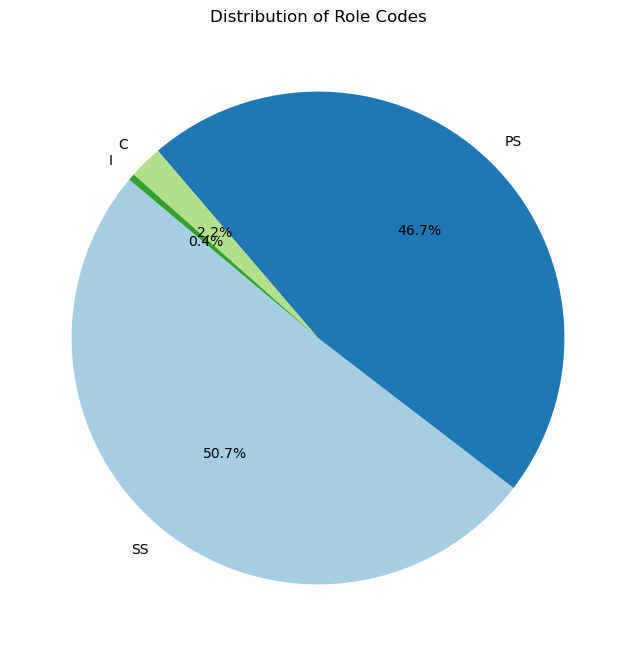

In [13]:
# Pie chart to check the values counts of role code
role_counts = df['role_cod'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Role Codes')
plt.show()

In [14]:

df['route'].value_counts()

Oral                                     65446
Subcutaneous                             37233
Intravenous (not otherwise specified)    33428
Intravenous drip                          7299
Other                                     2496
Intramuscular                             2005
Respiratory (inhalation)                  1440
Transplacental                            1333
Intra-uterine                              626
Intraocular                                423
Intravenous bolus                          376
Transdermal                                319
Intrathecal                                290
Intraperitoneal                            212
Ophthalmic                                 151
Topical                                    141
Vaginal                                    128
Parenteral                                 126
Nasal                                      109
Intra-arterial                              89
Cutaneous                                   60
Epidural     

In [15]:
# Creating a new column with broad categories of route
categories = {
    "Oral and Related Routes": ["Oral", "Oral use", "Sublingual"],
    "Intravenous and Related Routes": ["Intravenous (not otherwise specified)", "Intravenous drip", "Intravenous bolus"],
    "Respiratory and Inhalation Routes": ["Respiratory (inhalation)", "Nasal", "Endotracheal"],
    "Subcutaneous and Intramuscular Routes": ["Subcutaneous", "Intramuscular"],
    "Intra-Organ or Invasive Routes": ["Intrathecal", "Intra-arterial", "Intra-articular", "Intraperitoneal", "Intraocular"],
    "Transdermal and Topical Routes": ["Transdermal", "Cutaneous", "Topical"],
    "Reproductive and Genital Routes": ["Vaginal", "Urethral", "Intra-uterine", "Endocervical"],
    "Specialized Routes": ["Rectal", "Epidural", "Transplacental", "Hemodialysis", "Parenteral", "Transmammary"]
}


def categorize_route(route):
    for category, routes in categories.items():
        if route in routes:
            return category
    return "Other"

df['broad_category_route'] = df['route'].apply(categorize_route)


In [16]:
df['broad_category_route'].value_counts()

Oral and Related Routes                  65495
Intravenous and Related Routes           41103
Subcutaneous and Intramuscular Routes    39238
Other                                     2746
Respiratory and Inhalation Routes         1583
Specialized Routes                        1570
Intra-Organ or Invasive Routes            1018
Reproductive and Genital Routes            754
Transdermal and Topical Routes             520
Name: broad_category_route, dtype: int64

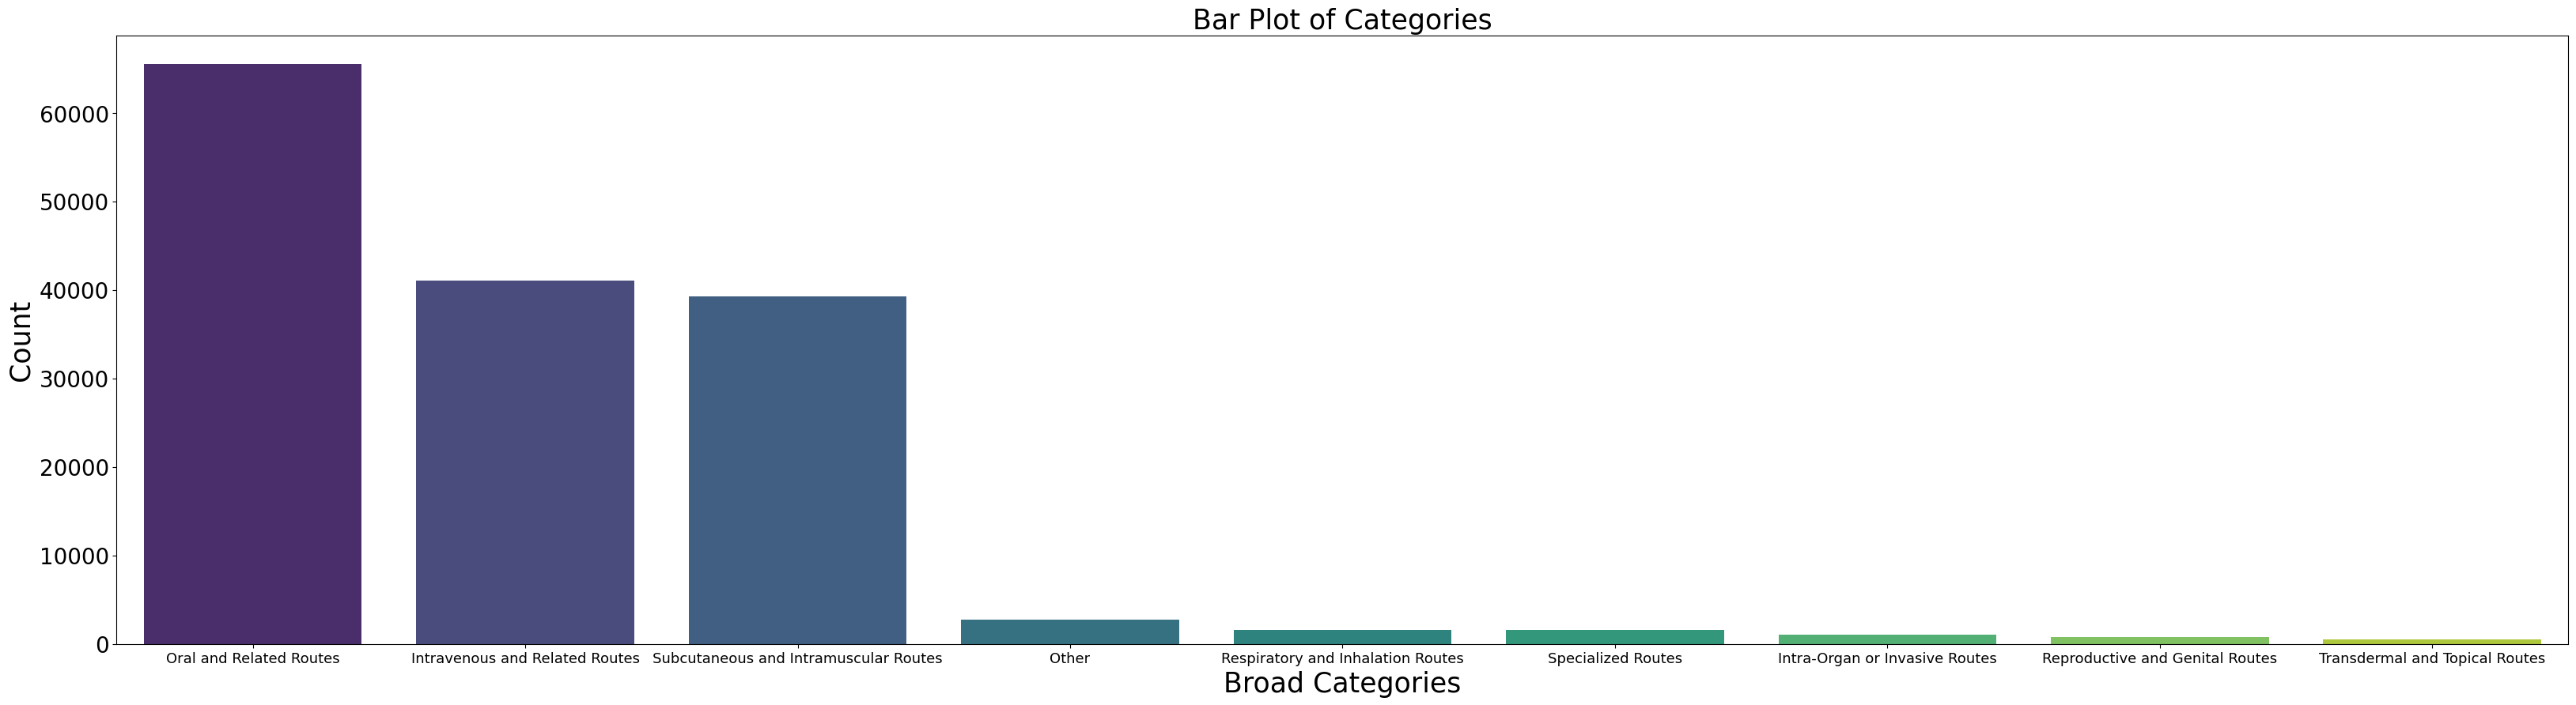

In [17]:

category_counts = df['broad_category_route'].value_counts()

plt.figure(figsize=(40, 10))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


plt.xlabel("Broad Categories", fontsize= 25)
plt.ylabel("Count", fontsize= 25)
plt.title("Bar Plot of Categories", fontsize= 25)
plt.xticks(fontsize= 13)
plt.yticks(fontsize=20)

plt.show()

In [18]:
df['dose_freq'].value_counts()

qd       38115
UNK      20382
hs       11533
bid       8979
QD        8936
1x        8065
Once      7190
q3w       6566
once      5082
QM        4740
BID       4072
daily     4001
qw        3881
QOW       3342
QW        2792
qow       2539
Daily     2346
ONCE      2266
DAILY     1431
Q3W       1172
qm        1122
tid        851
1X         822
qod        615
q2wk       608
TID        425
q12h       330
biw        224
BIW        220
HS         217
prn        158
tiw        155
q8h        150
Q12H       134
q6h        114
qid        103
qh          58
QOD         50
PRN         50
TIW         47
QH          30
QID         28
Qh          19
q4h         16
Bid         10
Q8H         10
Q12h         9
q2h          8
Q8h          3
qD           3
Biw          3
q3h          2
Qd           2
Q6h          1
Name: dose_freq, dtype: int64

In [19]:
# most of the dose frequencies are repeated in different cases. We should convert them all to lower case first
df['dose_freq'] = df['dose_freq'].str.lower()

In [20]:
df['dose_freq'].value_counts()

qd       47056
unk      20382
once     14538
bid      13061
hs       11750
1x        8887
daily     7778
q3w       7738
qw        6673
qow       5881
qm        5862
tid       1276
qod        665
q2wk       608
q12h       473
biw        447
prn        208
tiw        202
q8h        163
qid        131
q6h        115
qh         107
q4h         16
q2h          8
q3h          2
Name: dose_freq, dtype: int64

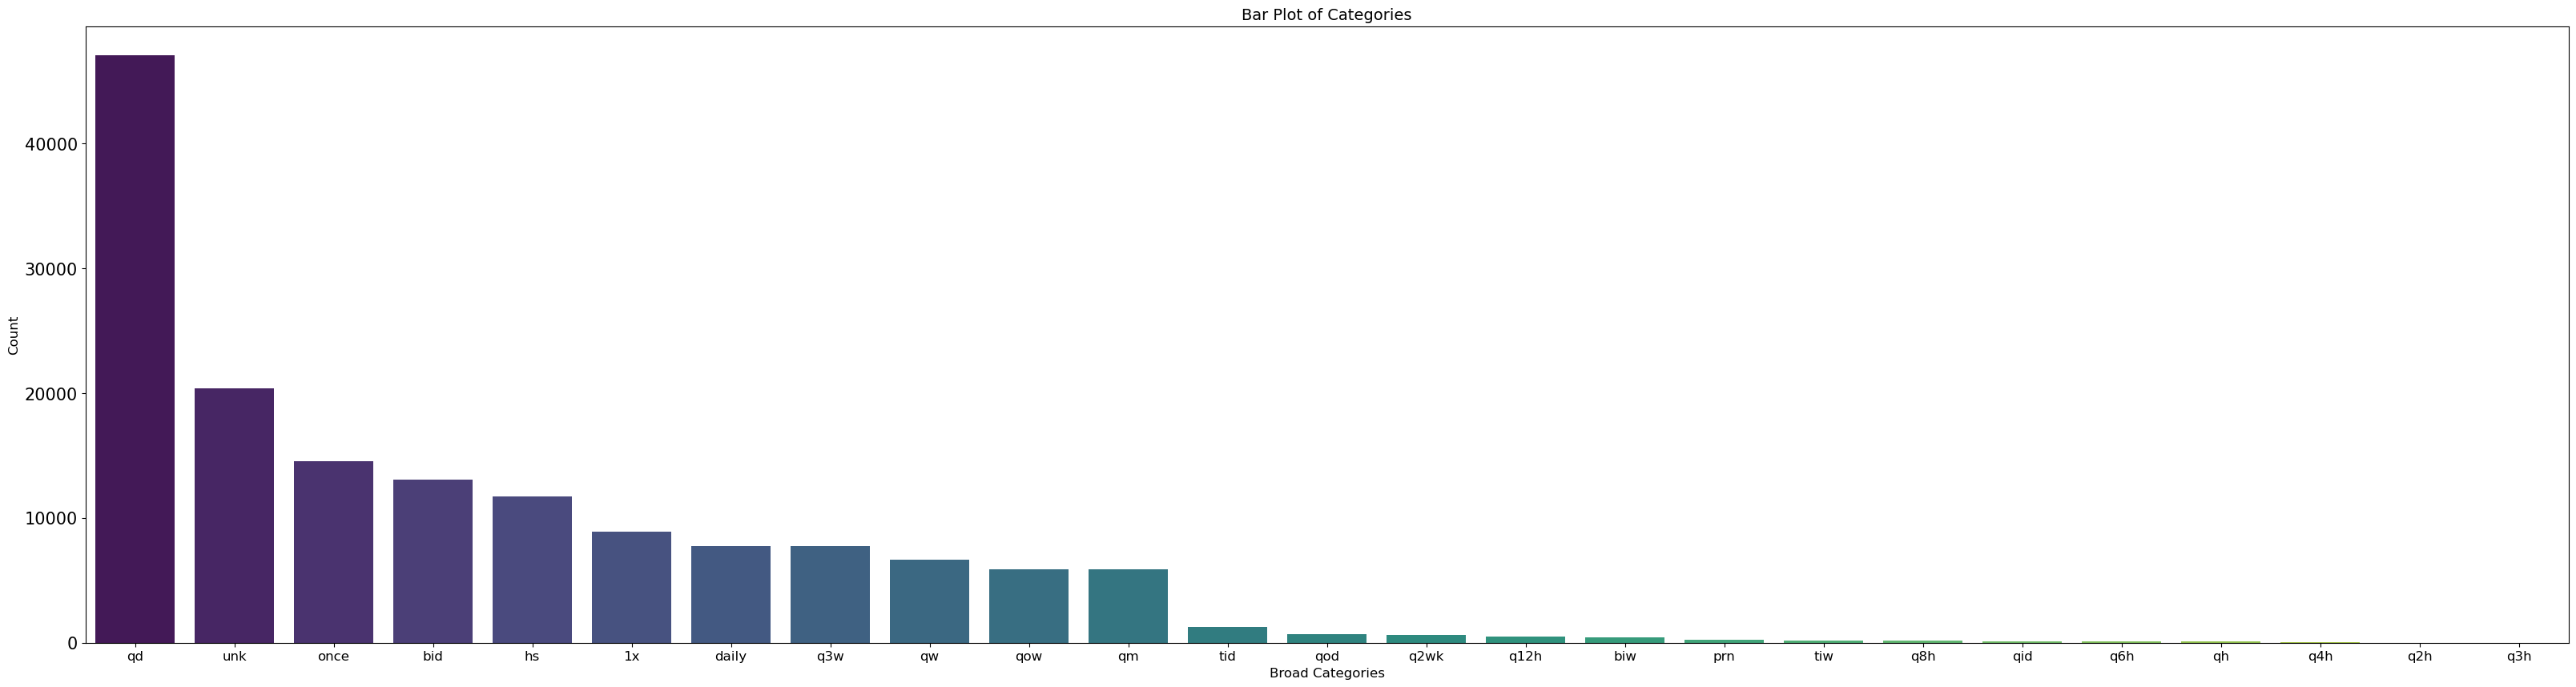

In [21]:
category_counts = df['dose_freq'].value_counts()

# Plot the bar plot
plt.figure(figsize=(40, 10))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Broad Categories", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Bar Plot of Categories", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

# Show the plot
plt.show()

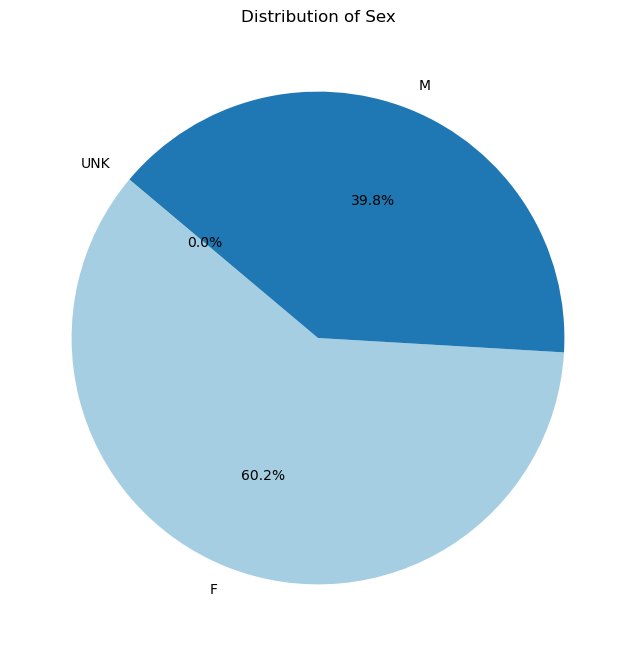

In [22]:
# Plotting pie chart for sex column
role_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Sex')
plt.show()

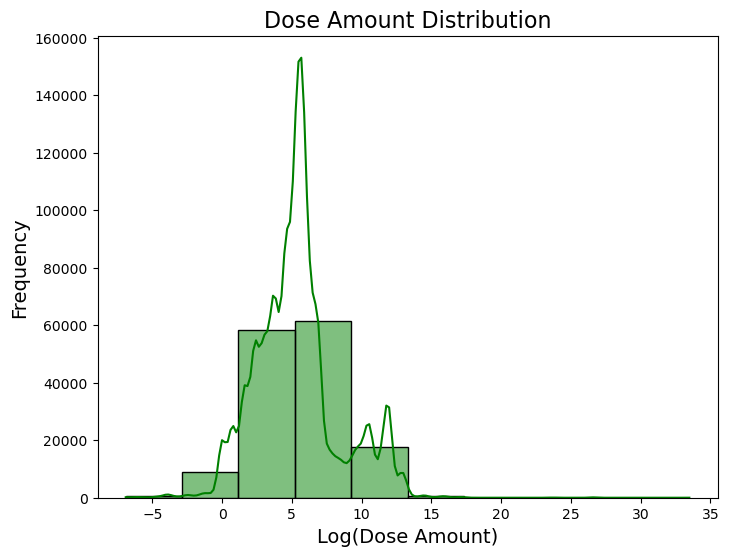

In [23]:
filtered_df = df[df['dose_amt']!=0]
plt.figure(figsize=(8, 6))
X = np.log(filtered_df['dose_amt'])
sns.histplot(X , bins=10, kde=True, color='green')
plt.title('Dose Amount Distribution', fontsize=16)
plt.xlabel('Log(Dose Amount)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


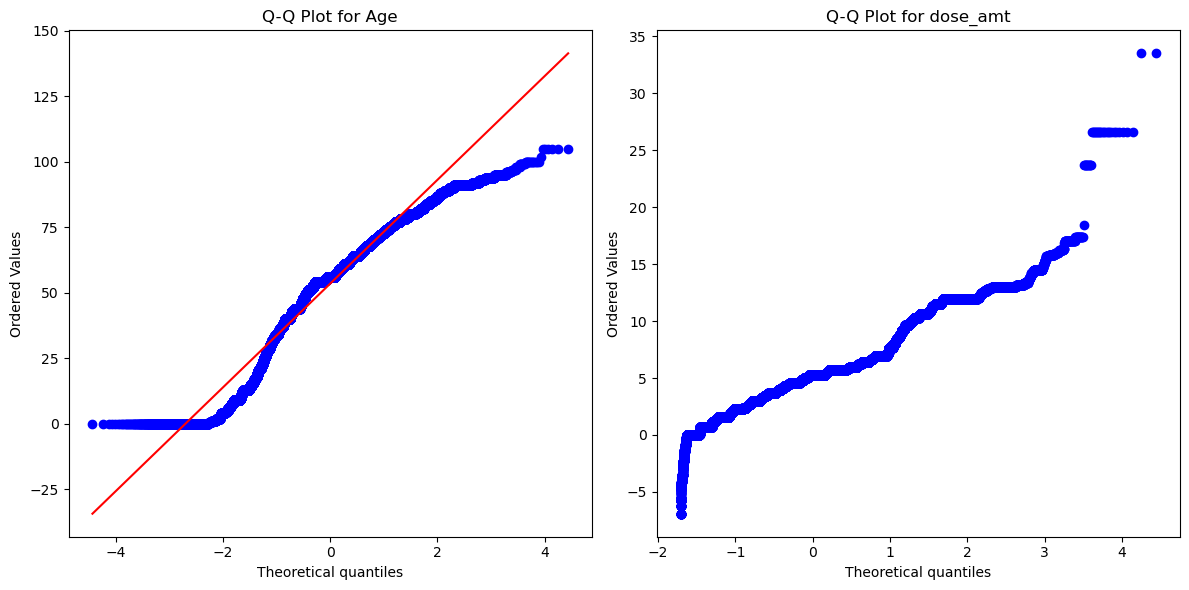

In [24]:
import scipy.stats as stats

# Q-Q Plot for 'age' column
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Age')

# Q-Q Plot for 'dose_amt' column
plt.subplot(1, 2, 2)
stats.probplot(np.log(df['dose_amt']), dist="norm", plot=plt)
plt.title('Q-Q Plot for dose_amt')

plt.tight_layout()
plt.show()

In [25]:
df['dose_amt'].describe()

count    1.540270e+05
mean     4.601823e+09
std      1.262857e+12
min      0.000000e+00
25%      2.300000e+01
50%      2.000000e+02
75%      6.000000e+02
max      3.504586e+14
Name: dose_amt, dtype: float64

In [26]:
df.head()

,primaryid,rept_cod,mfr_sndr,age,sex,e_sub,reporter_country,occr_country,role_cod,prod_ai,route,dechal,pt,outc_cod,dose_freq,dose_amt,day,month,broad_category_route
0,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Respiratory acidosis,HO|OT,bid,500.0,1,1,Oral and Related Routes
1,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Cardiac failure congestive,HO|OT,bid,500.0,1,1,Oral and Related Routes
2,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Torsade de pointes,HO|OT,bid,500.0,1,1,Oral and Related Routes
3,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Electrocardiogram QT prolonged,HO|OT,bid,500.0,1,1,Oral and Related Routes
4,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Agitation,HO|OT,bid,500.0,1,1,Oral and Related Routes


### Applying Statistical Analysis

In [27]:
# Finding the sample size
from statsmodels.stats.power import GofChisquarePower

alpha = 0.05  # Significance level
power = 0.8   # Desired power
effect_size = 0.3  # Effect size (small = 0.1, medium = 0.3, large = 0.5)

analysis = GofChisquarePower()
sample_size = analysis.solve_power(effect_size, alpha=alpha, power=power)

print(f"Required sample size: {int(sample_size)}")

Required sample size: 87


/opt/anaconda3/lib/python3.11/site-packages/scipy/_lib/_util.py:69: RuntimeWarning: overflow encountered in _ncx2_sf
  np.place(out, cond, f(*temp))


In [28]:
# Conducting  chi-squared test between rept_cod and outc_cod
from scipy.stats import chi2_contingency

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['rept_cod'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between report code and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between report code and outcome.")

Chi-Square Statistic: 1.3854950527219438
P-value: 0.9999992876143118
Degrees of Freedom: 16
Fail to reject the null hypothesis: No significant association between report code and outcome.


In [29]:
# Conducting  chi-squared test between Manufacturer name and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['mfr_sndr'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Manufacturer name and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between Manufacturer name and outcome.")

Chi-Square Statistic: 326.23680343932443
P-value: 0.0006218260412455689
Degrees of Freedom: 248
Reject the null hypothesis: There is a significant association between Manufacturer name and outcome.


In [30]:
# Conducting chi-squared test between sex and outc_cod

sampled_df = df.sample(n=87, random_state=42)


contingency_table = pd.crosstab(sampled_df['sex'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between sex and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between sex and outcome.")

Chi-Square Statistic: 8.07325214726888
P-value: 0.42634755763025245
Degrees of Freedom: 8
Fail to reject the null hypothesis: No significant association between sex and outcome.


In [31]:
# Conducting  chi-squared test between e-sub and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['e_sub'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between electronic submission and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between electronic submission and outcome.")

Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis: No significant association between electronic submission and outcome.


In [32]:
# Conducting chi-squared test between reporter_country and occr_country

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['reporter_country'], sampled_df['occr_country'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between reporter country and occurence country.")
else:
    print("Fail to reject the null hypothesis: No significant association between reporter country and occurence country.")

Chi-Square Statistic: 1522.5
P-value: 3.482905349167246e-154
Degrees of Freedom: 324
Reject the null hypothesis: There is a significant association between reporter country and occurence country.


In [33]:
# Conducting  chi-squared test between occr_country and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['occr_country'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between occurance country and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between occurance country and outcome.")


Chi-Square Statistic: 227.03604749592142
P-value: 1.2334178665654848e-05
Degrees of Freedom: 144
Reject the null hypothesis: There is a significant association between occurance country and outcome.


In [34]:
# Conducting  chi-squared test between role_cod and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['role_cod'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between role_cod and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between role_cod and outcome.")

Chi-Square Statistic: 37.92477364435019
P-value: 0.0015511656366009694
Degrees of Freedom: 16
Reject the null hypothesis: There is a significant association between role_cod and outcome.


In [35]:
# Conducting chi-squared test between Product Active Ingredients and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['prod_ai'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Product Active Ingredients and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between Product Active Ingredients and outcome.")

Chi-Square Statistic: 452.55593578090577
P-value: 0.10474469387351483
Degrees of Freedom: 416
Fail to reject the null hypothesis: No significant association between Product Active Ingredients and outcome.


### The chi-squared test no significant correlation between product active ingredient and outcome code. But we used it in our model because it is an important column.

In [36]:
# Conducting chi-squared test between dechal and outc_cod
sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['dechal'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Dechal and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between Dechal and outcome.")

Chi-Square Statistic: 38.76037100703438
P-value: 0.028932323563143278
Degrees of Freedom: 24
Reject the null hypothesis: There is a significant association between Dechal and outcome.


In [37]:
# Conducting chi-squared test between Preferred Medical Terminology and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['pt'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Preferred Medical Terminology and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between Preferred Medical Terminology and outcome.")

Chi-Square Statistic: 659.8685012466525
P-value: 0.1549852125083039
Degrees of Freedom: 624
Fail to reject the null hypothesis: No significant association between Preferred Medical Terminology and outcome.


In [38]:
# Conducting chi-squared test between Dose Frequency and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['dose_freq'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Dose Frequency and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between Dose Frequency and outcome.")

Chi-Square Statistic: 128.26356447340837
P-value: 0.015538390064999947
Degrees of Freedom: 96
Reject the null hypothesis: There is a significant association between Dose Frequency and outcome.


In [39]:
# Conducting chi-squared test between Month and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['month'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Month and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between Month and outcome.")

Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis: No significant association between Month and outcome.


In [40]:
# Conducting chi-squared test between broad category route and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['broad_category_route'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between broad_category_route and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between broad_category_route and outcome.")

Chi-Square Statistic: 26.251035452544198
P-value: 0.9955473329176254
Degrees of Freedom: 48
Fail to reject the null hypothesis: No significant association between broad_category_route and outcome.


In [41]:
df.head()

,primaryid,rept_cod,mfr_sndr,age,sex,e_sub,reporter_country,occr_country,role_cod,prod_ai,route,dechal,pt,outc_cod,dose_freq,dose_amt,day,month,broad_category_route
0,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Respiratory acidosis,HO|OT,bid,500.0,1,1,Oral and Related Routes
1,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Cardiac failure congestive,HO|OT,bid,500.0,1,1,Oral and Related Routes
2,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Torsade de pointes,HO|OT,bid,500.0,1,1,Oral and Related Routes
3,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Electrocardiogram QT prolonged,HO|OT,bid,500.0,1,1,Oral and Related Routes
4,104658923,EXP,AUROBINDO,31.0,F,Y,United States,US,PS,CIPROFLOXACIN,Oral,D,Agitation,HO|OT,bid,500.0,1,1,Oral and Related Routes


In [42]:
# Conducting chi-squared test between route and outc_cod

sampled_df = df.sample(n=87, random_state=42)

contingency_table = pd.crosstab(sampled_df['route'], sampled_df['outc_cod'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between route and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between route and outcome.")

Chi-Square Statistic: 27.603614750856256
P-value: 0.9999803645563393
Degrees of Freedom: 64
Fail to reject the null hypothesis: No significant association between route and outcome.


In [43]:
# Shapiro - Wilk Test to check for Normality of age
from scipy.stats import shapiro

stat, p_value = shapiro(df['dose_amt'])

print("Shapiro-Wilk Test Statistic:", stat)
print("P-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: Data follows a normal distribution.")
else:
    print("Reject the null hypothesis: Data does not follow a normal distribution.")

Shapiro-Wilk Test Statistic: 0.00026667118072509766
P-value: 0.0
Reject the null hypothesis: Data does not follow a normal distribution.


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [44]:
# Performing Kruskal-Wallis H Test on age, outcome code
from scipy.stats import kruskal

df['outc_cod_split'] = df['outc_cod'].apply(lambda x: x.split('|'))


unique_labels = set(label for sublist in df['outc_cod_split'] for label in sublist)

groups = {}
for label in unique_labels:
    groups[label] = df[df['outc_cod_split'].apply(lambda x: label in x)]['age']

group_values = [values for values in groups.values() if len(values) > 1]  # Ignore single-value groups
stat, p_value = kruskal(*group_values)

print("Kruskal-Wallis Test Statistic:", stat)
print("P-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: Distributions are similar across groups.")
else:
    print("Reject the null hypothesis: Distributions differ across groups.")

Kruskal-Wallis Test Statistic: 5500.857294191197
P-value: 0.0
Reject the null hypothesis: Distributions differ across groups.


In [45]:
# Converting pt to tfidf vector and performing SVD to reduce dimensions

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    tokens = text.lower().split() 
    tokens = [word for word in tokens if word not in stop_words]  
    tokens = [lemmatizer.lemmatize(word) for word in tokens] 
    return tokens


df['processed'] = df['pt'].apply(preprocess_text)

all_words = [word for tokens in df['processed'] for word in tokens]
word_counts = Counter(all_words)

sorted_counts = sorted(word_counts.values(), reverse=True)
cumulative_frequency = np.cumsum(sorted_counts) / sum(sorted_counts)

optimal_max_features = next(idx for idx, freq in enumerate(cumulative_frequency) if freq >= 0.95)
print(f"Optimal max_features: {optimal_max_features}")

# Limiting TF-IDF features to optimal value
tfidf = TfidfVectorizer(max_features=optimal_max_features)
tfidf_matrix = tfidf.fit_transform(df['pt'])

# Applying Truncated SVD to reduce dimensions
n_components = 1  
svd = TruncatedSVD(n_components=n_components, random_state=42)
reduced_features = svd.fit_transform(tfidf_matrix)

# Adding the reduced features as a single column to the DataFrame
df['reduced_tfidf'] = reduced_features[:, 0]  # Extracting the first (and only) dimension

print(df[['pt', 'reduced_tfidf']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrestaveeramaneni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrestaveeramaneni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimal max_features: 1027
                               pt  reduced_tfidf
0            Respiratory acidosis   1.409489e-04
1      Cardiac failure congestive   2.259260e-04
2              Torsade de pointes   0.000000e+00
3  Electrocardiogram QT prolonged   1.211139e-06
4                       Agitation   2.261298e-10


In [46]:
df = df.drop(['processed'], axis  = 1)
df = df.rename(columns={'reduced_tfidf': 'pt_tfidf'})

In [47]:
# Perform Kruskal-Wallis H Test on tfidf converted column of Preferred Medical Terminology and outcome code
df['outc_cod_split'] = df['outc_cod'].apply(lambda x: x.split('|'))


unique_labels = set(label for sublist in df['outc_cod_split'] for label in sublist)

groups = {}
for label in unique_labels:
    group_indices = df[df['outc_cod_split'].apply(lambda x: label in x)].index
    group_tfidf = tfidf_matrix[group_indices]
    groups[label] = group_tfidf

# We took only groups with more than 1 sample to avoid errors in the test
group_values = [group.toarray().flatten() for group in groups.values() if group.shape[0] > 1]  # Ignoring single-value groups

stat, p_value = kruskal(*group_values)

print("Kruskal-Wallis Test Statistic:", stat)
print("P-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: Distributions are similar across groups.")
else:
    print("Reject the null hypothesis: Distributions differ across groups.")

Kruskal-Wallis Test Statistic: 172.15869186666103
P-value: 1.567013168343207e-34
Reject the null hypothesis: Distributions differ across groups.


In [48]:
 # Performing Kruskal-Wallis H Test between dose_amt and outcome code

df['outc_cod_split'] = df['outc_cod'].apply(lambda x: x.split('|'))


unique_labels = set(label for sublist in df['outc_cod_split'] for label in sublist)

groups = {}
for label in unique_labels:
    groups[label] = df[df['outc_cod_split'].apply(lambda x: label in x)]['dose_amt']

group_values = [values for values in groups.values() if len(values) > 1]  # Ignoring single-value groups
stat, p_value = kruskal(*group_values)

print("Kruskal-Wallis Test Statistic:", stat)
print("P-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: Distributions are similar across groups.")
else:
    print("Reject the null hypothesis: Distributions differ across groups.")

Kruskal-Wallis Test Statistic: 542.1718979888639
P-value: 6.874740825962868e-114
Reject the null hypothesis: Distributions differ across groups.


### Based on our analysis we must drop columns rept_cod, sex, e_sub, reporter_country,pt, month, day, route, broad category route

In [49]:
df.drop(['rept_cod','sex', 'e_sub','reporter_country','pt','month', 'day', 'outc_cod', 'route', 'broad_category_route'],inplace = True,axis = 1)

In [50]:
df.head()

,primaryid,mfr_sndr,age,occr_country,role_cod,prod_ai,dechal,dose_freq,dose_amt,outc_cod_split,pt_tfidf
0,104658923,AUROBINDO,31.0,US,PS,CIPROFLOXACIN,D,bid,500.0,"[HO, OT]",1.409489e-04
1,104658923,AUROBINDO,31.0,US,PS,CIPROFLOXACIN,D,bid,500.0,"[HO, OT]",2.259260e-04
2,104658923,AUROBINDO,31.0,US,PS,CIPROFLOXACIN,D,bid,500.0,"[HO, OT]",0.000000e+00
3,104658923,AUROBINDO,31.0,US,PS,CIPROFLOXACIN,D,bid,500.0,"[HO, OT]",1.211139e-06
4,104658923,AUROBINDO,31.0,US,PS,CIPROFLOXACIN,D,bid,500.0,"[HO, OT]",2.261298e-10


### Types of Encoding used for each feature 
1. One hot encoding: Dechal
2. Ordinal Encoding - role_cod
3. Frequency Encoding: dose frequncy,,mnfr_sndr, occurence country, product active ingredient
4. Standard scaling- (age,dose_amt)
 Multilabel encoding for the target variable

In [51]:
# One-Hot Encoding
one_hot_columns = ['dechal']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

In [52]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['age', 'dose_amt']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [53]:
df['dose_freq'].value_counts()

qd       47056
unk      20382
once     14538
bid      13061
hs       11750
1x        8887
daily     7778
q3w       7738
qw        6673
qow       5881
qm        5862
tid       1276
qod        665
q2wk       608
q12h       473
biw        447
prn        208
tiw        202
q8h        163
qid        131
q6h        115
qh         107
q4h         16
q2h          8
q3h          2
Name: dose_freq, dtype: int64

In [54]:
# Frequncy encoding of dose_freq column 
dose_freq_counts = df['dose_freq'].value_counts()

df['dose_freq'] = df['dose_freq'].map(dose_freq_counts)

print(df[['dose_freq']].head())


   dose_freq
0      13061
1      13061
2      13061
3      13061
4      13061


In [55]:
# Scaling the encoded dose_freq column
scaler = StandardScaler()

df['dose_freq'] = scaler.fit_transform(df[['dose_freq']])

print(df[['dose_freq']].head())


   dose_freq
0   -0.55875
1   -0.55875
2   -0.55875
3   -0.55875
4   -0.55875


In [56]:
df['role_cod'].value_counts()

SS    78093
PS    71891
C      3362
I       681
Name: role_cod, dtype: int64

In [57]:
# Ordinal Encoding 
from sklearn.preprocessing import OrdinalEncoder
custom_order = ['PS', 'SS', 'C', 'I']
ordinal_encoder = OrdinalEncoder(categories=[custom_order])
df['role_cod'] = ordinal_encoder.fit_transform(df[['role_cod']])


In [58]:
# Multilabel encoding of the target variable
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
outcome_encoded = pd.DataFrame(mlb.fit_transform(df['outc_cod_split']), columns=mlb.classes_)

df = pd.concat([df, outcome_encoded], axis=1)

In [59]:
df.head()

,primaryid,mfr_sndr,age,occr_country,role_cod,prod_ai,dose_freq,dose_amt,outc_cod_split,pt_tfidf,dechal_N,dechal_U,dechal_Y,CA,DE,DS,HO,LT,OT,RI
0,104658923,AUROBINDO,-1.113229,US,0.0,CIPROFLOXACIN,-0.55875,-0.003644,"[HO, OT]",1.409489e-04,0,0,0,0,0,0,1,0,1,0
1,104658923,AUROBINDO,-1.113229,US,0.0,CIPROFLOXACIN,-0.55875,-0.003644,"[HO, OT]",2.259260e-04,0,0,0,0,0,0,1,0,1,0
2,104658923,AUROBINDO,-1.113229,US,0.0,CIPROFLOXACIN,-0.55875,-0.003644,"[HO, OT]",0.000000e+00,0,0,0,0,0,0,1,0,1,0
3,104658923,AUROBINDO,-1.113229,US,0.0,CIPROFLOXACIN,-0.55875,-0.003644,"[HO, OT]",1.211139e-06,0,0,0,0,0,0,1,0,1,0
4,104658923,AUROBINDO,-1.113229,US,0.0,CIPROFLOXACIN,-0.55875,-0.003644,"[HO, OT]",2.261298e-10,0,0,0,0,0,0,1,0,1,0


In [60]:
# Frequency Encoding for 'mfr_sndr'
mfr_sndr_counts = df['mfr_sndr'].value_counts()
df['mfr_sndr'] = df['mfr_sndr'].map(mfr_sndr_counts)

# Frequency Encoding for 'occr_country'
occr_country_counts = df['occr_country'].value_counts()
df['occr_country'] = df['occr_country'].map(occr_country_counts)

# Frequency Encoding for 'prod_ai'
prod_ai_counts = df['prod_ai'].value_counts()
df['prod_ai'] = df['prod_ai'].map(prod_ai_counts)

# Frequency Encoding for 'primaryid'
primaryid_counts = df['primaryid'].value_counts()
df['primaryid'] = df['primaryid'].map(primaryid_counts)



In [61]:
# Scaling to the encoded columns
scaler_standard = StandardScaler()

df['mfr_sndr'] = scaler_standard.fit_transform(df[['mfr_sndr']])
df['occr_country'] = scaler_standard.fit_transform(df[['occr_country']])
df['prod_ai'] = scaler_standard.fit_transform(df[['prod_ai']])
df['primaryid'] = scaler_standard.fit_transform(df[['primaryid']])


In [62]:
df.head()

,primaryid,mfr_sndr,age,occr_country,role_cod,prod_ai,dose_freq,dose_amt,outc_cod_split,pt_tfidf,dechal_N,dechal_U,dechal_Y,CA,DE,DS,HO,LT,OT,RI
0,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,"[HO, OT]",1.409489e-04,0,0,0,0,0,0,1,0,1,0
1,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,"[HO, OT]",2.259260e-04,0,0,0,0,0,0,1,0,1,0
2,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,"[HO, OT]",0.000000e+00,0,0,0,0,0,0,1,0,1,0
3,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,"[HO, OT]",1.211139e-06,0,0,0,0,0,0,1,0,1,0
4,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,"[HO, OT]",2.261298e-10,0,0,0,0,0,0,1,0,1,0


In [63]:
df.drop(['outc_cod_split'], axis = 1, inplace = True)

In [64]:
df.head()

,primaryid,mfr_sndr,age,occr_country,role_cod,prod_ai,dose_freq,dose_amt,pt_tfidf,dechal_N,dechal_U,dechal_Y,CA,DE,DS,HO,LT,OT,RI
0,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,1.409489e-04,0,0,0,0,0,0,1,0,1,0
1,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,2.259260e-04,0,0,0,0,0,0,1,0,1,0
2,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,0.000000e+00,0,0,0,0,0,0,1,0,1,0
3,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,1.211139e-06,0,0,0,0,0,0,1,0,1,0
4,-0.056732,-0.473637,-1.113229,1.184034,0.0,-0.689746,-0.55875,-0.003644,2.261298e-10,0,0,0,0,0,0,1,0,1,0


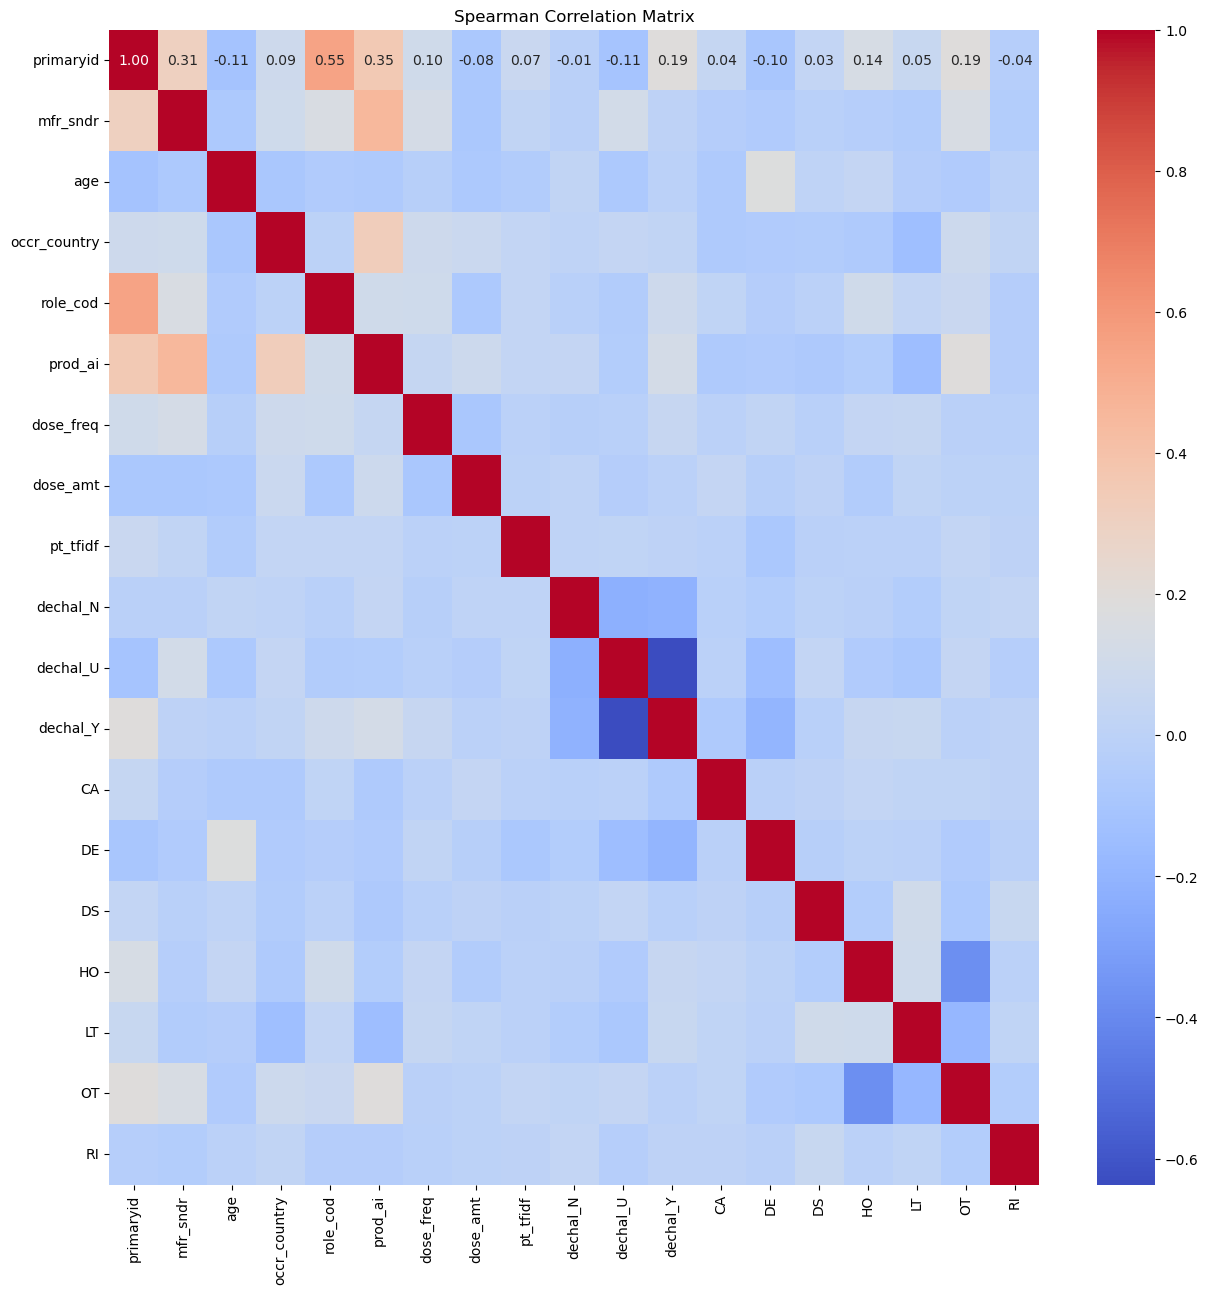

In [65]:
# Correlation Matrix
spearman_corr = df.corr(method='spearman')

plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

### Reason for not dropping the primary id column: 
In our project, the primaryid/caseid is not just a number to uniqely identify rows. It helps us in identifying different drugs, side effects of drugs, outcomes for a particular case which is expressed in several rows. Our main aim was to train a model which can identify drug combinations that can cause adverse effects. 
Our dataset is not Independently and Identically Distributed. Rows of each case are associated with each other. Ideally to predict the type of adverse effects, all the drugs belonging to a case should be provided to the model for prediction. 

### Reason why we did not combine all the rows of a case into a single row:
Few cases had more than 50 rows due to the number of drugs or preferred medical terminology (side effects) of drugs. To combine all such drug combinations and preffered medical terminology into a single row and later into numerical encoded columns will lead to a lot of information loss. We cannot clearly explain which drug causes what type of side effect(pt) and what role the drug played in causing the adverse effect. This would also reduce the size of the dataset to 6000 rows. 
Therefore, we decided to use the primary id column in our initial model development to tell the model which rows belong to the same case. For this we performed frequnency encoding of the primaryid. There might be cases which have a same counts of rows but we felt this was the best encoding technique to work with.





In [66]:
# Performing Train Test Split
y_columns = ['CA', 'DE', 'DS', 'HO', 'LT', 'OT', 'RI']  # Target columns
X_columns = [col for col in df.columns if col not in y_columns]  # Feature columns

# Separate into X and y
X = df[X_columns]
y = df[y_columns]

# Spliting into train and test with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (107818, 12)
X_test shape: (46209, 12)
y_train shape: (107818, 7)
y_test shape: (46209, 7)


In [67]:
target_columns = ['CA',	'DE', 'DS',	'HO', 'LT',	'OT', 'RI']

### Logistic Regression Model

Accuracy: 0.4733

Classification Report:
              precision    recall  f1-score   support

          CA       1.00      0.01      0.03       301
          DE       0.64      0.39      0.49      3858
          DS       0.00      0.00      0.00      1108
          HO       0.58      0.36      0.44     20910
          LT       1.00      0.15      0.26      2979
          OT       0.81      1.00      0.89     36972
          RI       0.00      0.00      0.00        75

   micro avg       0.76      0.70      0.73     66203
   macro avg       0.58      0.27      0.30     66203
weighted avg       0.72      0.70      0.68     66203
 samples avg       0.78      0.74      0.73     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


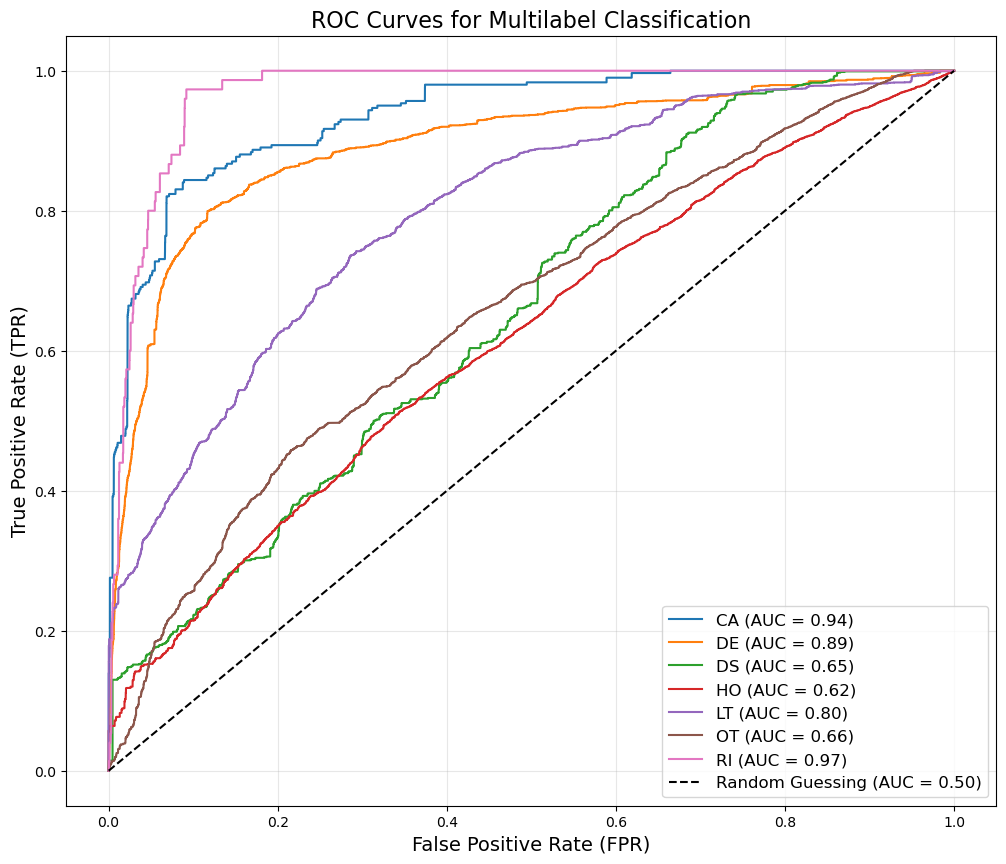

Macro-Averaged AUROC: 0.7894
Micro-Averaged AUROC: 0.9448


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

log_reg = LogisticRegression(max_iter=1000)

# Creating a MultiOutputClassifier, which applies one classifier for each label
multi_target_model = MultiOutputClassifier(log_reg, n_jobs=-1)
multi_target_model.fit(X_train, y_train)

y_pred = multi_target_model.predict(X_test)

# Probabilites for ROC Curve
y_pred_prob = multi_target_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names = target_columns))

# Plotting ROC curves for each label
num_labels = y_test.shape[1]  
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    
    prob_i = y_pred_prob[i][:, 1] 
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()


y_pred_prob_combined = np.column_stack([y[:, 1] for y in y_pred_prob]) 

macro_auc = roc_auc_score(y_test, y_pred_prob_combined, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc:.4f}")

micro_auc = roc_auc_score(y_test, y_pred_prob_combined, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc:.4f}")



### Checking for Underfitting/ Overfitting

In [69]:

# Getting predictions on training data
y_train_pred = multi_target_model.predict(X_train)

# Calculating accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (Logistic Regression): {train_accuracy:.4f}")

# Getting predictions on test data
ypred = multi_target_model.predict(X_test)

# Calculating accuracy score on test data
test_accuracy = accuracy_score(y_test, ypred)
print(f"Test Accuracy (Logistic Regression): {test_accuracy:.4f}")


Training Accuracy (Logistic Regression): 0.4711
Test Accuracy (Logistic Regression): 0.4733


### Random Forest Classifier

Accuracy: 0.9023

Classification Report:
              precision    recall  f1-score   support

          CA       1.00      0.89      0.94       301
          DE       0.97      0.93      0.95      3858
          DS       0.97      0.86      0.91      1108
          HO       0.94      0.91      0.93     20910
          LT       0.98      0.86      0.91      2979
          OT       0.96      0.98      0.97     36972
          RI       1.00      0.81      0.90        75

   micro avg       0.96      0.95      0.95     66203
   macro avg       0.97      0.89      0.93     66203
weighted avg       0.96      0.95      0.95     66203
 samples avg       0.95      0.95      0.94     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


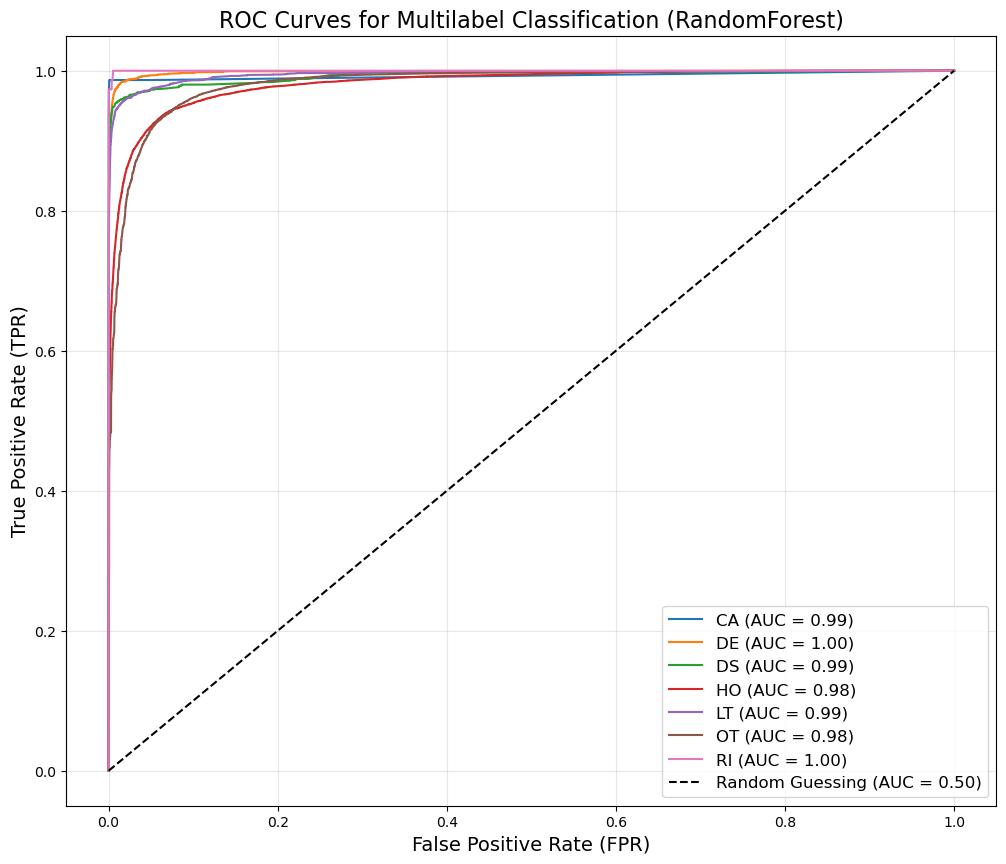

Macro-Averaged AUROC: 0.9919
Micro-Averaged AUROC: 0.9970


In [70]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a MultiOutputClassifier, which applies one classifier for each label
multilabel_classifier_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

multilabel_classifier_rf.fit(X_train, y_train)

y_pred_rf = multilabel_classifier_rf.predict(X_test)

y_pred_prob_rf = multilabel_classifier_rf.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_columns))

# Plotting ROC Curves for each label
num_labels = y_test.shape[1]  
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    
    prob_i = y_pred_prob_rf[i][:, 1]  

    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (RandomForest)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)


plt.show()

y_pred_prob_combined_rf = np.column_stack([y[:, 1] for y in y_pred_prob_rf])  

macro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_rf:.4f}")

micro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_rf:.4f}")


### From now, we assume the data is independtly and identically distributed.

We later dropped the primaryid column, making the assumption now that the dataset is independtly and identically distributed. We train the model on individual independent rows. This model will work because for each row, the drug specifications and side effects are clearly mentioned. Although the model cannot capture the drug combinations which can case adverse effects. It can predict which drugs are prone to adverse effects. 

In [71]:
df.drop(['primaryid'], axis = 1, inplace = True)

In [72]:
y_columns = ['CA', 'DE', 'DS', 'HO', 'LT', 'OT', 'RI']  # Target columns
X_columns = [col for col in df.columns if col not in y_columns]  # Feature columns


X = df[X_columns]
y = df[y_columns]

# Spliting into train and test with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (107818, 11)
X_test shape: (46209, 11)
y_train shape: (107818, 7)
y_test shape: (46209, 7)


### Logistic Regression Model

Accuracy: 0.4459

Classification Report:
              precision    recall  f1-score   support

          CA       1.00      0.01      0.03       301
          DE       0.64      0.40      0.49      3858
          DS       0.00      0.00      0.00      1108
          HO       0.56      0.35      0.43     20910
          LT       0.00      0.00      0.00      2979
          OT       0.80      1.00      0.89     36972
          RI       0.00      0.00      0.00        75

   micro avg       0.74      0.69      0.72     66203
   macro avg       0.43      0.25      0.26     66203
weighted avg       0.67      0.69      0.66     66203
 samples avg       0.78      0.74      0.72     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


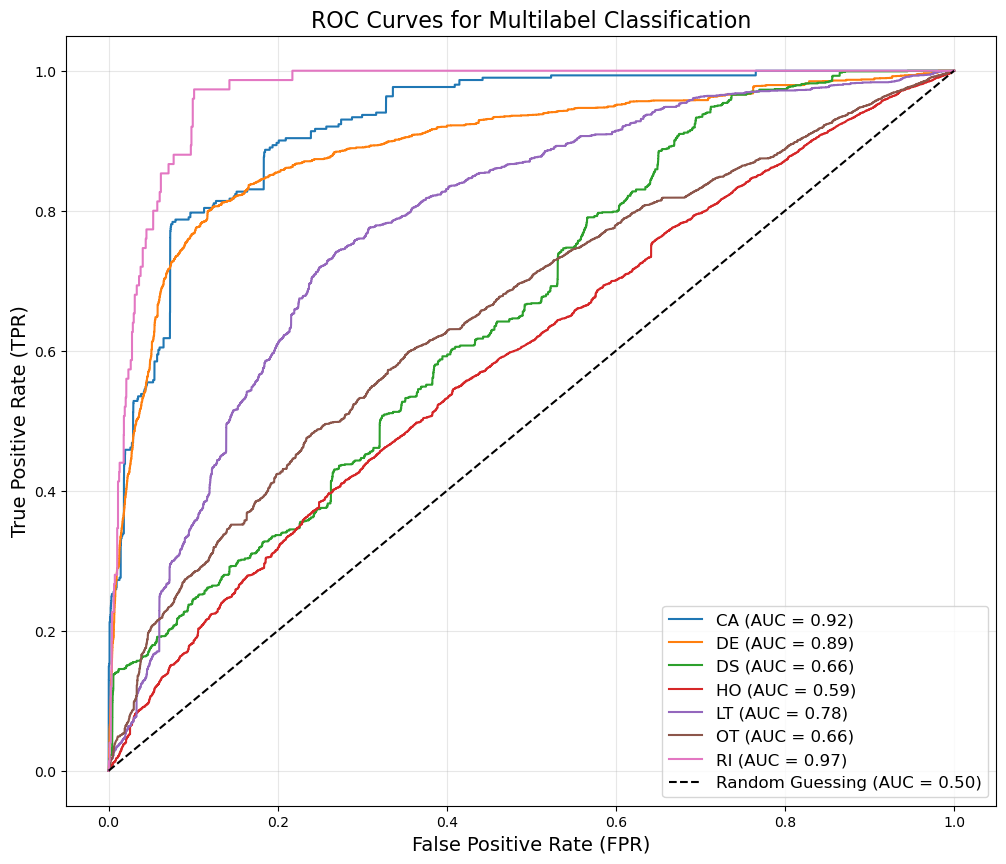

Macro-Averaged AUROC: 0.7815
Micro-Averaged AUROC: 0.9417


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

log_reg = LogisticRegression(max_iter=1000)

# Creating a MultiOutputClassifier, which applies one classifier for each label
multi_target_model = MultiOutputClassifier(log_reg, n_jobs=-1)
multi_target_model.fit(X_train, y_train)


y_pred = multi_target_model.predict(X_test)

y_pred_prob = multi_target_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names = target_columns))

num_labels = y_test.shape[1] 
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    prob_i = y_pred_prob[i][:, 1] 
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)

    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

y_pred_prob_combined = np.column_stack([y[:, 1] for y in y_pred_prob])  

macro_auc = roc_auc_score(y_test, y_pred_prob_combined, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc:.4f}")

micro_auc = roc_auc_score(y_test, y_pred_prob_combined, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc:.4f}")



### Checking for Overfitting or Underfitting

In [74]:

# Getting predictions on training data
y_train_pred = multi_target_model.predict(X_train)

# Calculating accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (Logistic Regression): {train_accuracy:.4f}")

# Getting predictions on test data
ypred = multi_target_model.predict(X_test)

# Calculating accuracy score on test data
test_accuracy = accuracy_score(y_test, ypred)
print(f"Test Accuracy (Logistic Regression): {test_accuracy:.4f}")


Training Accuracy (Logistic Regression): 0.4419
Test Accuracy (Logistic Regression): 0.4459


### Random Forest Classifier

Accuracy: 0.8131

Classification Report:
              precision    recall  f1-score   support

          CA       0.98      0.87      0.92       301
          DE       0.92      0.86      0.89      3858
          DS       0.91      0.76      0.83      1108
          HO       0.87      0.82      0.85     20910
          LT       0.93      0.80      0.86      2979
          OT       0.94      0.97      0.95     36972
          RI       0.98      0.76      0.86        75

   micro avg       0.92      0.91      0.91     66203
   macro avg       0.93      0.83      0.88     66203
weighted avg       0.92      0.91      0.91     66203
 samples avg       0.91      0.91      0.90     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


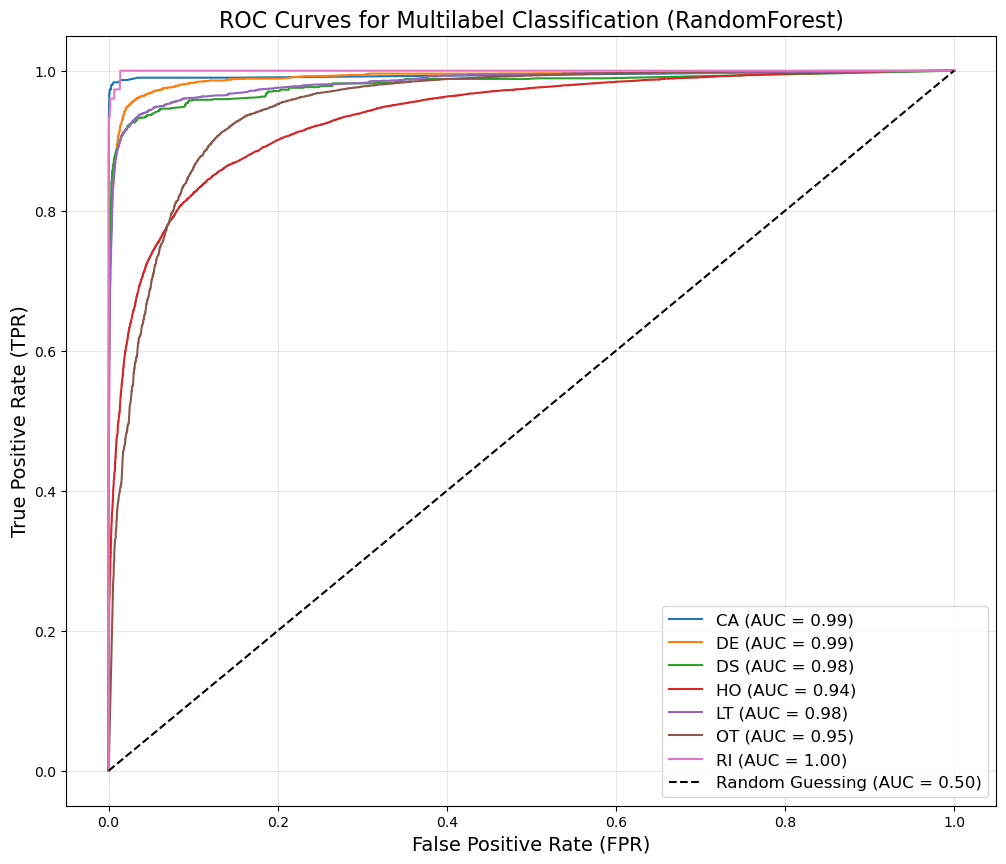

Macro-Averaged AUROC: 0.9763
Micro-Averaged AUROC: 0.9910


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a MultiOutputClassifier, which applies one classifier for each label
multilabel_classifier_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

multilabel_classifier_rf.fit(X_train, y_train)

y_pred_rf = multilabel_classifier_rf.predict(X_test)

y_pred_prob_rf = multilabel_classifier_rf.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_columns))

num_labels = y_test.shape[1]  
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    
    prob_i = y_pred_prob_rf[i][:, 1]  

    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (RandomForest)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

y_pred_prob_combined_rf = np.column_stack([y[:, 1] for y in y_pred_prob_rf])  

macro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_rf:.4f}")

micro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_rf:.4f}")


### XGBoost Classifier

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:25:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:25:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:25:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:25:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:

Accuracy: 0.7133

Classification Report:
              precision    recall  f1-score   support

          CA       0.99      0.92      0.95       301
          DE       0.92      0.82      0.87      3858
          DS       0.98      0.67      0.80      1108
          HO       0.82      0.70      0.75     20910
          LT       0.94      0.65      0.77      2979
          OT       0.89      0.97      0.93     36972
          RI       0.94      0.80      0.86        75

   micro avg       0.88      0.86      0.87     66203
   macro avg       0.93      0.79      0.85     66203
weighted avg       0.88      0.86      0.86     66203
 samples avg       0.87      0.87      0.85     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


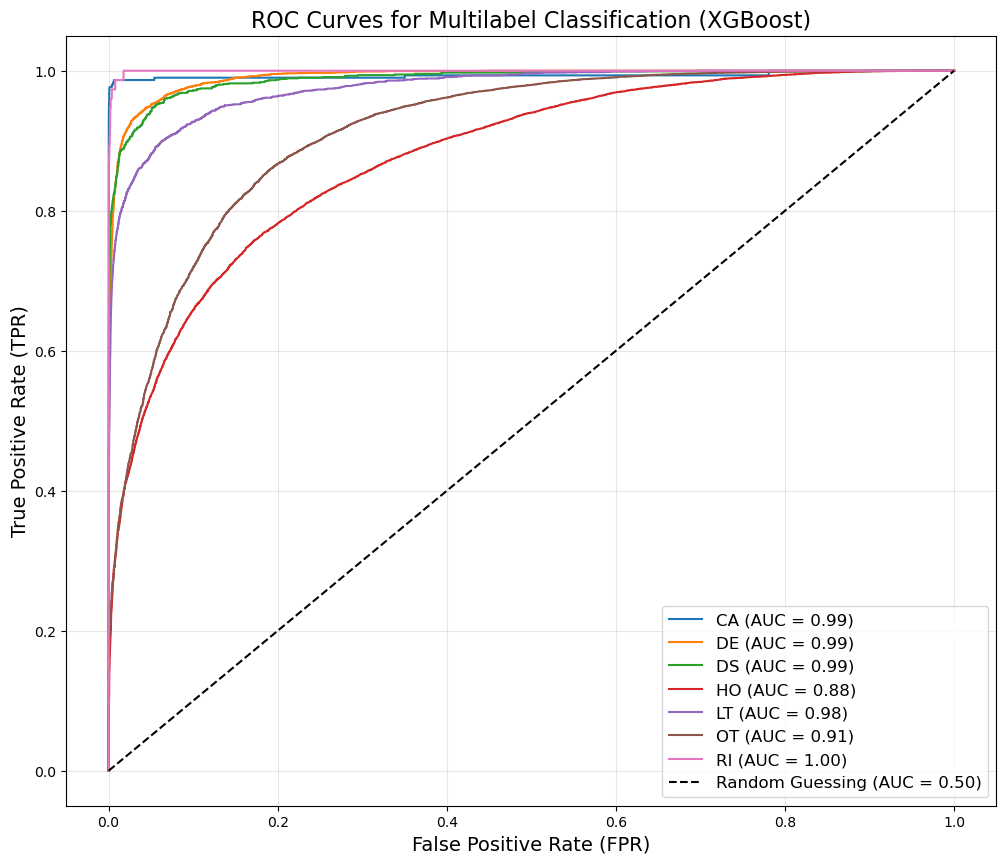

Macro-Averaged AUROC: 0.9628
Micro-Averaged AUROC: 0.9852


In [76]:
from xgboost import XGBClassifier


xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
multilabel_classifier_xgb = MultiOutputClassifier(xgb_classifier, n_jobs=-1)

multilabel_classifier_xgb.fit(X_train, y_train)

y_pred_xgb = multilabel_classifier_xgb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=target_columns))


y_pred_prob_xgb = multilabel_classifier_xgb.predict_proba(X_test)

num_labels = y_test.shape[1]  
plt.figure(figsize=(12, 10))

for i in range(num_labels):
 
    prob_i = y_pred_prob_xgb[i][:, 1]  
    
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
 
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (XGBoost)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


y_pred_prob_combined_xgb = np.column_stack([y[:, 1] for y in y_pred_prob_xgb])  


macro_auc_xgb = roc_auc_score(y_test, y_pred_prob_combined_xgb, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_xgb:.4f}")


micro_auc_xgb = roc_auc_score(y_test, y_pred_prob_combined_xgb, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_xgb:.4f}")


### Performing Hyperparameter Tuning on Random Forest Classifier using Grid Search

### This model the is the best fit model

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'rf__bootstrap': False, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best Cross-Validation Score: 0.7939
Accuracy: 0.8207

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       301
           1       0.92      0.86      0.89      3858
           2       0.91      0.75      0.83      1108
           3       0.88      0.83      0.85     20910
           4       0.93      0.80      0.86      2979
           5       0.94      0.97      0.95     36972
           6       0.98      0.76      0.86        75

   micro avg       0.92      0.91      0.91     66203
   macro avg       0.93      0.84      0.88     66203
weighted avg       0.92      0.91      0.91     66203
 samples avg       0.92      0.91      0.90     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


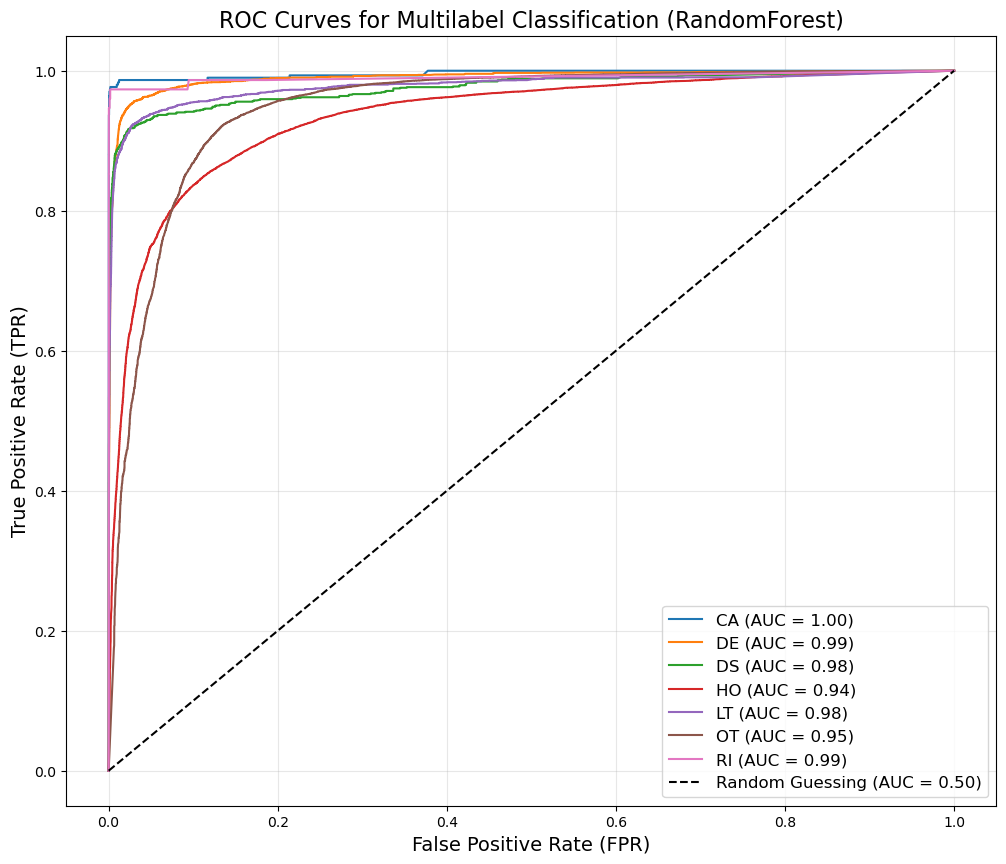

Macro-Averaged AUROC: 0.9736
Micro-Averaged AUROC: 0.9897


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Defining the pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),                 # Feature scaling
    ('rf', RandomForestClassifier(random_state=42))  # Random forest model
])

# Defining the reduced hyperparameter grid
param_grid = {
    'rf__n_estimators': [150, 200],              
    'rf__max_depth': [7, 12, None],              
    'rf__min_samples_split': [5, 10],              
    'rf__min_samples_leaf': [1, 2],                 
    'rf__bootstrap': [True, False],                
}


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,          
    n_jobs=-1,
    verbose=1      
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

best_pipeline = grid_search.best_estimator_

y_pred_rf = best_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

y_pred_prob_rf = best_pipeline.predict_proba(X_test)

num_labels = y_test.shape[1] 
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    
    prob_i = y_pred_prob_rf[i][:, 1]  
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (RandomForest)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

y_pred_prob_combined_rf = np.column_stack([y[:, 1] for y in y_pred_prob_rf]) 

macro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_rf:.4f}")

micro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_rf:.4f}")



### Checking the feature importance


Feature Importance (by Label):
    mfr_sndr       age  occr_country  role_cod   prod_ai  dose_freq  dose_amt  \
CA  0.153656  0.238096      0.110389  0.050406  0.212292   0.120130  0.000508   
DE  0.090260  0.159010      0.081262  0.020515  0.115334   0.051639  0.003040   
DS  0.124343  0.248570      0.163554  0.024243  0.168581   0.065950  0.002788   
HO  0.100507  0.262698      0.099694  0.022220  0.149499   0.067057  0.006160   
LT  0.129365  0.238787      0.157148  0.032288  0.199556   0.066809  0.004299   
OT  0.138414  0.234419      0.112387  0.025719  0.157594   0.064664  0.006752   
RI  0.208933  0.225676      0.059604  0.007696  0.220863   0.110449  0.000606   

    pt_tfidf  dechal_N  dechal_U  dechal_Y  
CA  0.058857  0.003573  0.022221  0.029872  
DE  0.240269  0.058349  0.101427  0.078895  
DS  0.151660  0.009861  0.019651  0.020797  
HO  0.245471  0.011590  0.016101  0.019005  
LT  0.118785  0.006580  0.016003  0.030379  
OT  0.206841  0.011750  0.018717  0.022745  
RI  

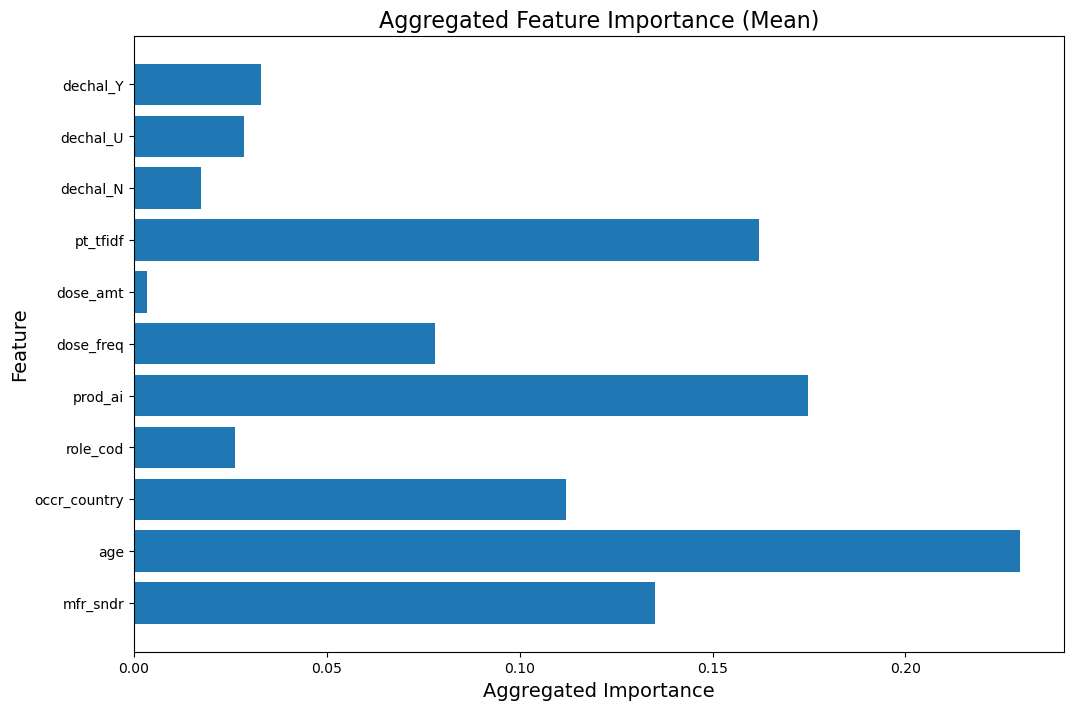

In [78]:
# Extracting feature importance for each output class
num_labels = y_train.shape[1]  
feature_importances = []

for i in range(num_labels):
    rf = multilabel_classifier_rf.estimators_[i]
    importances = rf.feature_importances_
    feature_importances.append(importances)


feature_importance_df = pd.DataFrame(feature_importances, columns=X_train.columns, index=target_columns)

print("\nFeature Importance (by Label):")
print(feature_importance_df)

aggregated_importances = feature_importance_df.mean(axis=0) 
plt.figure(figsize=(12, 8))
plt.barh(X_train.columns, aggregated_importances)
plt.xlabel('Aggregated Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Aggregated Feature Importance (Mean)', fontsize=16)
plt.show()


In [79]:
df_imp = df.drop(['dechal_Y','dechal_U','dechal_N', 'dose_amt', 'role_cod'], axis = 1)

### Using only those features which have an aggregated importance > 0.05

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split


y_columns = ['CA', 'DE', 'DS', 'HO', 'LT', 'OT', 'RI']  # Target columns
X_columns = [col for col in df_imp.columns if col not in y_columns]  # Feature columns

X = df_imp[X_columns]
y = df_imp[y_columns]

# Spliting into train and test with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (107818, 6)
X_test shape: (46209, 6)
y_train shape: (107818, 7)
y_test shape: (46209, 7)


### Random Forest Classifier

Accuracy: 0.8060

Classification Report:
              precision    recall  f1-score   support

          CA       0.97      0.88      0.92       301
          DE       0.90      0.73      0.80      3858
          DS       0.92      0.75      0.83      1108
          HO       0.87      0.82      0.85     20910
          LT       0.91      0.79      0.85      2979
          OT       0.94      0.97      0.95     36972
          RI       0.97      0.76      0.85        75

   micro avg       0.92      0.90      0.91     66203
   macro avg       0.93      0.81      0.86     66203
weighted avg       0.91      0.90      0.90     66203
 samples avg       0.91      0.90      0.90     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


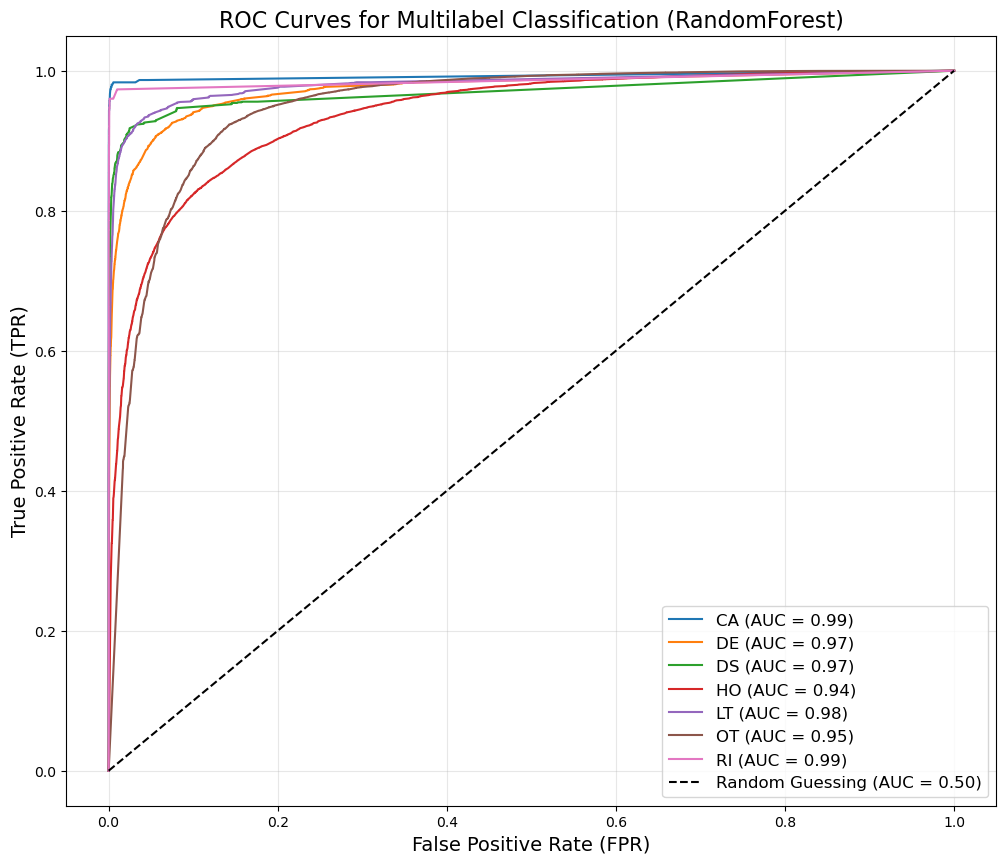

Macro-Averaged AUROC: 0.9697
Micro-Averaged AUROC: 0.9889


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a MultiOutputClassifier, which applies one classifier for each label
multilabel_classifier_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

multilabel_classifier_rf.fit(X_train, y_train)

y_pred_rf = multilabel_classifier_rf.predict(X_test)

y_pred_prob_rf = multilabel_classifier_rf.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_columns))

num_labels = y_test.shape[1] 
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    
    prob_i = y_pred_prob_rf[i][:, 1]  
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (RandomForest)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

y_pred_prob_combined_rf = np.column_stack([y[:, 1] for y in y_pred_prob_rf]) 

macro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_rf:.4f}")

micro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_rf:.4f}")


### XGBoost Classifier

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:34:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:34:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:34:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:34:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:

Accuracy: 0.6785

Classification Report:
              precision    recall  f1-score   support

          CA       0.97      0.88      0.92       301
          DE       0.91      0.52      0.67      3858
          DS       0.97      0.62      0.76      1108
          HO       0.81      0.66      0.73     20910
          LT       0.92      0.61      0.73      2979
          OT       0.89      0.97      0.93     36972
          RI       0.92      0.77      0.84        75

   micro avg       0.87      0.83      0.85     66203
   macro avg       0.91      0.72      0.80     66203
weighted avg       0.87      0.83      0.84     66203
 samples avg       0.87      0.85      0.84     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


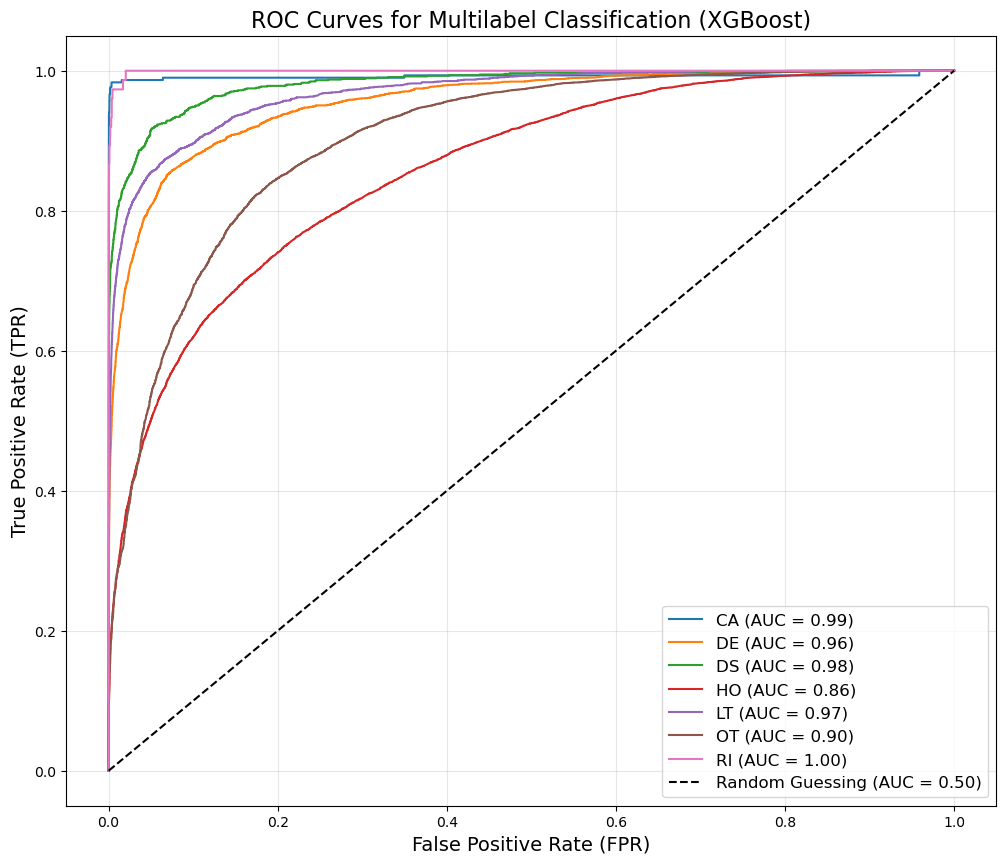

Macro-Averaged AUROC: 0.9514
Micro-Averaged AUROC: 0.9807


In [82]:
from xgboost import XGBClassifier


xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
multilabel_classifier_xgb = MultiOutputClassifier(xgb_classifier, n_jobs=-1)

multilabel_classifier_xgb.fit(X_train, y_train)

y_pred_xgb = multilabel_classifier_xgb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=target_columns))


y_pred_prob_xgb = multilabel_classifier_xgb.predict_proba(X_test)

num_labels = y_test.shape[1]  
plt.figure(figsize=(12, 10))

for i in range(num_labels):
 
    prob_i = y_pred_prob_xgb[i][:, 1]  
    
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
 
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (XGBoost)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


y_pred_prob_combined_xgb = np.column_stack([y[:, 1] for y in y_pred_prob_xgb])  


macro_auc_xgb = roc_auc_score(y_test, y_pred_prob_combined_xgb, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_xgb:.4f}")


micro_auc_xgb = roc_auc_score(y_test, y_pred_prob_combined_xgb, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_xgb:.4f}")


### Models performed relatively better before selecting features based on feature importance

### Defining a Pipeline and performing Grid Search

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 150}
Best Cross-Validation Score: 0.7768
Accuracy: 0.8075

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       301
           1       0.89      0.73      0.80      3858
           2       0.92      0.75      0.82      1108
           3       0.87      0.82      0.85     20910
           4       0.91      0.79      0.84      2979
           5       0.94      0.97      0.95     36972
           6       0.97      0.75      0.84        75

   micro avg       0.92      0.89      0.90     66203
   macro avg       0.92      0.81      0.86     66203
weighted avg       0.91      0.89      0.90     66203
 samples avg       0.91      0.90      0.90     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


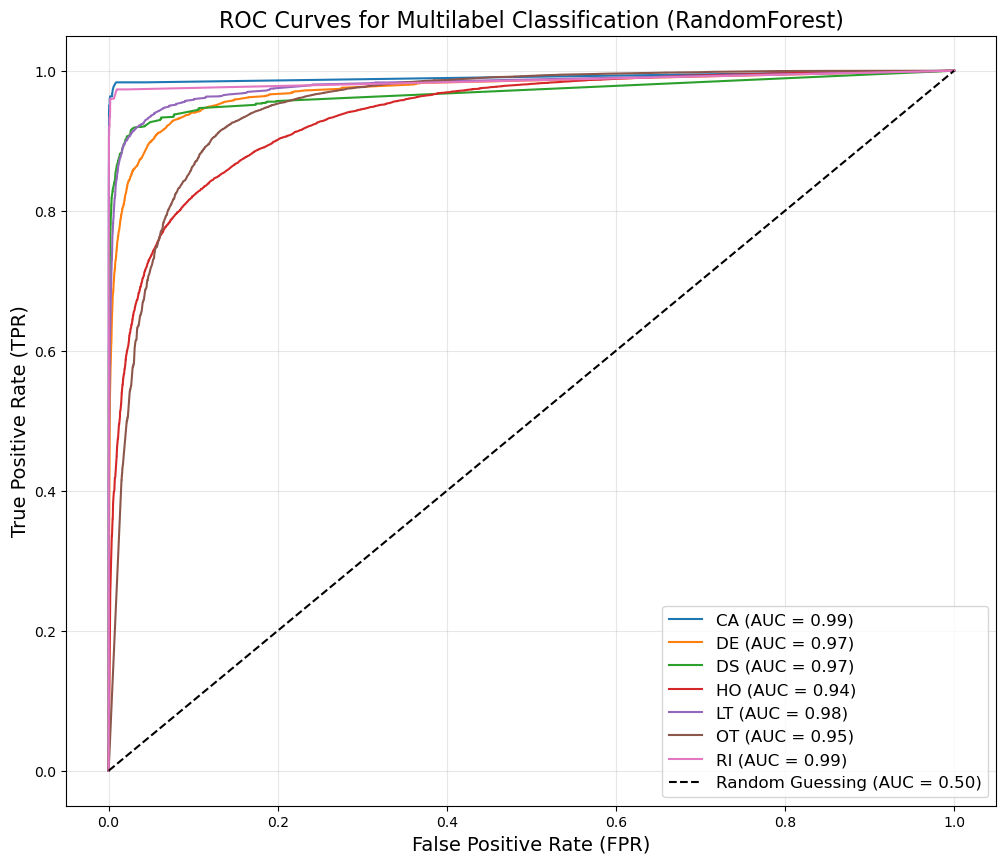

Macro-Averaged AUROC: 0.9693
Micro-Averaged AUROC: 0.9888


In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline([        
    ('rf', RandomForestClassifier(random_state=42)) 
])

# Defining a smaller hyperparameter grid for faster execution  
param_grid = {
    'rf__n_estimators': [100, 150],       
    'rf__max_depth': [10, 20, None],      
    'rf__min_samples_split': [2, 5],      
    'rf__min_samples_leaf': [1, 2],      
}



grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,          
    n_jobs=-1,
    verbose=1      
)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

best_pipeline = grid_search.best_estimator_

y_pred_rf = best_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

y_pred_prob_rf = best_pipeline.predict_proba(X_test)

num_labels = y_test.shape[1] 
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    
    prob_i = y_pred_prob_rf[i][:, 1]  
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (RandomForest)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

y_pred_prob_combined_rf = np.column_stack([y[:, 1] for y in y_pred_prob_rf]) 

macro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_rf:.4f}")

micro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_rf:.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'rf__bootstrap': False, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best Cross-Validation Score: 0.7810
Accuracy: 0.8112

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       301
           1       0.90      0.74      0.81      3858
           2       0.93      0.76      0.83      1108
           3       0.87      0.82      0.85     20910
           4       0.92      0.80      0.85      2979
           5       0.94      0.96      0.95     36972
           6       0.98      0.76      0.86        75

   micro avg       0.92      0.89      0.91     66203
   macro avg       0.93      0.82      0.87     66203
weighted avg       0.92      0.89      0.90     66203
 samples avg       0.92      0.90      0.90     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


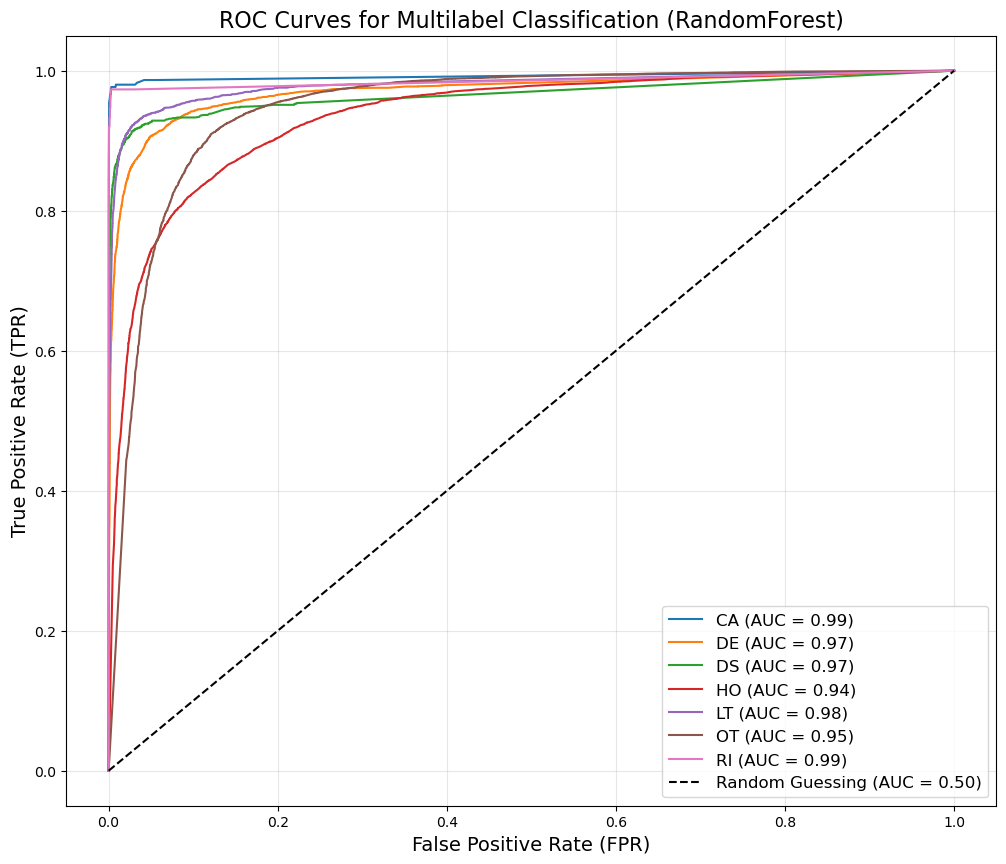

Macro-Averaged AUROC: 0.9686
Micro-Averaged AUROC: 0.9875


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Defining the pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),                 # Feature scaling
    ('rf', RandomForestClassifier(random_state=42))  # Random forest model
])

# Defining the reduced hyperparameter grid
param_grid = {
    'rf__n_estimators': [150, 200],              
    'rf__max_depth': [7, 12, None],              
    'rf__min_samples_split': [5, 10],              
    'rf__min_samples_leaf': [1, 2],                 
    'rf__bootstrap': [True, False],                
}


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,          
    n_jobs=-1,
    verbose=1      
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

best_pipeline = grid_search.best_estimator_

y_pred_rf = best_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

y_pred_prob_rf = best_pipeline.predict_proba(X_test)

num_labels = y_test.shape[1] 
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    
    prob_i = y_pred_prob_rf[i][:, 1]  
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (RandomForest)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

y_pred_prob_combined_rf = np.column_stack([y[:, 1] for y in y_pred_prob_rf]) 

macro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_rf:.4f}")

micro_auc_rf = roc_auc_score(y_test, y_pred_prob_combined_rf, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_rf:.4f}")



### Even after Hyperparameter tuning, the accruacy did not increase.

### Ensemble model

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:47:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:47:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:47:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:47:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:

Ensemble Model Accuracy: 0.7847

Classification Report (Ensemble):
              precision    recall  f1-score   support

          CA       0.98      0.87      0.92       301
          DE       0.93      0.65      0.77      3858
          DS       0.97      0.68      0.80      1108
          HO       0.88      0.80      0.84     20910
          LT       0.94      0.70      0.80      2979
          OT       0.92      0.98      0.95     36972
          RI       0.93      0.76      0.84        75

   micro avg       0.91      0.88      0.90     66203
   macro avg       0.94      0.78      0.85     66203
weighted avg       0.91      0.88      0.89     66203
 samples avg       0.91      0.90      0.89     66203



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


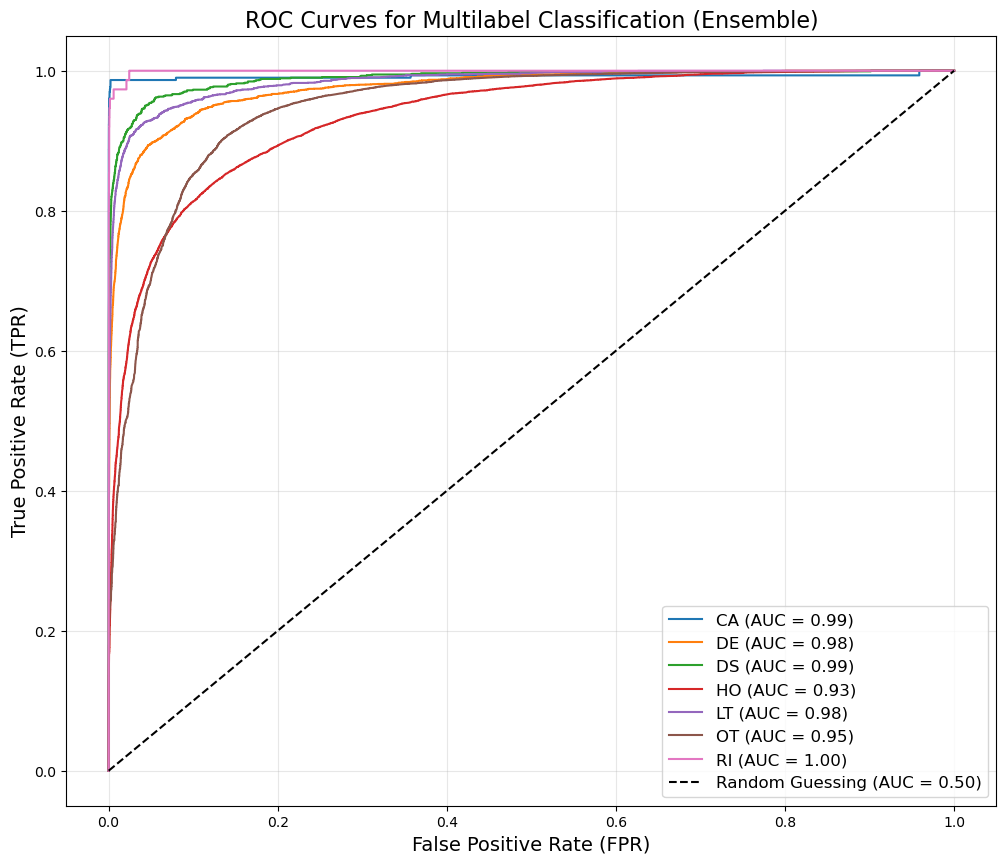

Macro-Averaged AUROC: 0.9749
Micro-Averaged AUROC: 0.9896


In [85]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Defining the base models
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_classifier), ('rf', rf_classifier)],
    voting='soft' 
)

multilabel_classifier_ensemble = MultiOutputClassifier(voting_clf, n_jobs=-1)

multilabel_classifier_ensemble.fit(X_train, y_train)

y_pred_ensemble = multilabel_classifier_ensemble.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.4f}")

print("\nClassification Report (Ensemble):")
print(classification_report(y_test, y_pred_ensemble, target_names=target_columns))

y_pred_prob_ensemble = multilabel_classifier_ensemble.predict_proba(X_test)

num_labels = y_test.shape[1]  
plt.figure(figsize=(12, 10))

for i in range(num_labels):
    prob_i = y_pred_prob_ensemble[i][:, 1]  
    
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], prob_i)
    auc = roc_auc_score(y_test.iloc[:, i], prob_i)
    
    plt.plot(fpr, tpr, label=f'{target_columns[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.title('ROC Curves for Multilabel Classification (Ensemble)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


y_pred_prob_combined_ensemble = np.column_stack([y[:, 1] for y in y_pred_prob_ensemble])

macro_auc_ensemble = roc_auc_score(y_test, y_pred_prob_combined_ensemble, average='macro')
print(f"Macro-Averaged AUROC: {macro_auc_ensemble:.4f}")

micro_auc_ensemble = roc_auc_score(y_test, y_pred_prob_combined_ensemble, average='micro')
print(f"Micro-Averaged AUROC: {micro_auc_ensemble:.4f}")
